# UNBOXING AMAZON REVIEWS

In the age of e-commerce, online reviews significantly influence consumer decisions and product success. However, the rise of fake reviews has become a pressing issue, undermining trust and distorting the credibility of review systems. Fake reviews can mislead consumers into purchasing low-quality products, unfairly inflate or damage a seller's reputation, and create an uneven playing field for businesses striving to maintain integrity. This not only erodes consumer confidence but also threatens the authenticity of digital marketplaces as a whole.

Our project focuses on analyzing Amazon reviews to identify and understand the characteristics of fake reviews. By leveraging machine learning techniques, we aim to detect suspicious patterns, uncover underlying trends, and assess the broader implications of these deceptive practices. Through our efforts, we aspire to contribute to a more transparent, trustworthy, and equitable e-commerce ecosystem for consumers and businesses alike.








# Section 0: Install and Import packages


*   Always run this section.




In [8]:
%pip install sqlalchemy==2.0.35
%pip install pandasql
%pip install transformers
%pip install afinn
%pip install textstat
%pip install --user -U nltk
%pip install torch torchvision
%pip install statsmodels
%pip install -U textblob
%pip install wordcloud
%python3 -m pip install --upgrade 'optree>=0.13.0

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python3` not found (But cell magic `%%python3` exists, did you mean that instead?).


In [9]:
# Import Libraries
import re
import string
import numpy as np
import pandas as pd
import pandasql as ps
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import torch
import statsmodels.api as sm
from IPython.display import clear_output
from afinn import Afinn
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.corpus import words
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from textstat import textstat
from textblob import TextBlob
# from transformers import BertTokenizer, BertModel
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('words')
# from google.colab import files

from transformers import pipeline
from wordcloud import WordCloud
from transformers import BertTokenizer, BertModel
from transformers import DistilBertTokenizer, DistilBertModel
from statsmodels.tsa.arima.model import ARIMA

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device_id = 0 if str(device) == 'cuda' else -1

In [11]:
print(device_id)

-1


# Section 1: Data Acquisition

### Amazon Customer Reviews Dataset
[Dataset](https://www.kaggle.com/datasets/cynthiarempel/amazon-us-customer-reviews-dataset)

Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazon’s iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

### Content

- marketplace: 2 letter country code of the marketplace where the review was written.


- customer_id: Random identifier that can be used to aggregate reviews written by a single author.


- review_id: The unique ID of the review.


- product_id: The unique Product ID the review pertains to.

- product_parent: Random identifier that can be used to aggregate reviews for the same product.

- product_title: Title of the product.

- product_category: Broad product category that can be used to group reviews
(also used to group the dataset into coherent parts).

- star_rating: The 1-5 star rating of the review.

- helpful_votes: Number of helpful votes.

- total_votes: Number of total votes the review received.

- vine: Review was written as part of the Vine program.

- verified_purchase: The review is on a verified purchase.

- review_headline: The title of the review.

- review_body: The review text.

- review_date: The date the review was written.

## Section 1.1: Data Downloading

The Kaggle Dataset contains several csv files pertaining to reviews from many different categories. Downloading all of the files would take up over 22 gb which is way too much. As a result, we decided to focus on 5 categories so the space would be much more manageable, which still having a good amount of variety in our data.

In [12]:
categories = ['Office_Products', 'Video_Games', 'Automotive', 'Shoes', 'Outdoors']

In [ ]:
# Load the dataset from kaggle and convert it to a dataframe
def load_dataset(category):
  # # Step 1 Download kaggle dataset
  # download_command = f"kaggle datasets download -d cynthiarempel/amazon-us-customer-reviews-dataset -f amazon_reviews_us_{category}_v1_00.tsv"
  # !{download_command}

  # # Step 2: Unzip the downloaded file
  # with zipfile.ZipFile(f"/content/amazon_reviews_us_{category}_v1_00.tsv.zip", 'r') as zip_ref:
  #   zip_ref.extractall("/content")

  # Step 3: Load dataset as dataframe
  df = pd.read_csv(f"amazon_reviews_us_{category}_v1_00.tsv", sep='\t', on_bad_lines='skip', low_memory=False)
  return df

First Display the data before any cleaning and wrangling.


In [19]:
# Show 10 observations from each dataset before cleaning and wrangling
def show_rows_datasets(categories):
  # Loop through categories
  for i, category in enumerate(categories):
    # Load dataset
    df = load_dataset(category)
    # Print out 10 observations
    print()
    print(f'Raw rows of {category} dataset')
    print('--------------------------------------------------')
    print(df.head(10))
    print()

show_rows_datasets(categories)


Raw rows of Office_Products dataset
--------------------------------------------------
  marketplace  customer_id       review_id  product_id  product_parent  \
0          US     43081963  R18RVCKGH1SSI9  B001BM2MAC       307809868   
1          US     10951564  R3L4L6LW1PUOFY  B00DZYEXPQ        75004341   
2          US     21143145  R2J8AWXWTDX2TF  B00RTMUHDW       529689027   
3          US     52782374  R1PR37BR7G3M6A  B00D7H8XB6       868449945   
4          US     24045652  R3BDDDZMZBZDPU  B001XCWP34        33521401   
5          US     21751234   R8T6MO75ND212  B004J2NBCO       214932869   
6          US      9109358  R2YWMQT2V11XYZ  B00MOPAG8K       863351797   
7          US      9967215  R1V2HYL6OI9V39  B003AHIK7U       383470576   
8          US     11234247  R3BLQBKUNXGFS4  B006TKH2RO       999128878   
9          US     12731488  R17MOWJCAR9Y8Q  B00W61M9K0       622066861   

                                       product_title product_category  \
0     Scotch Cushion Wra

## Section 1.2: Data Cleaning

1.   Define functions to clean each column

      a. Remove any nulls if necessary

      b. Normalize any columns and remove any "nonsense" values

      c. Cast the column to its proper type

2.   Define function to clean all columns
3.   Define functions to filter data to a more reasonable size



In [21]:
# Clean the marketplace column
def clean_marketplace(df):
  # df = df.dropna(subset=['marketplace']) # Drop all null values in this column
  df = df[df['marketplace'].notna() & (df['marketplace'] != '')]
  df = df[df['marketplace'] == 'US'] # Ensure that all values are US
  df['marketplace'] = df['marketplace'].astype('string') # Change the type to string
  return df

# Clean the customer_id column
def clean_customer_id(df):
  df = df.dropna(subset=['customer_id']) # Drop all null values in this column
  df['customer_id'] = df['customer_id'].astype('string') # Change the type to string
  return df

# Clean the review_id column
def clean_review_id(df):
  df = df.dropna(subset=['review_id']) # Drop all null values in this column
  df['review_id'] = df['review_id'].astype('string') # Change the type to string
  return df

# Clean the product_id column
def clean_product_id(df):
  df = df.dropna(subset=['product_id']) # Drop all null values in this column
  df['product_id'] = df['product_id'].astype('string') # Change the type to string
  return df

# Clean the product_parent column
def clean_product_parent(df):
  df = df.dropna(subset=['product_parent']) # Drop all null values in this column
  df['product_parent'] = df['product_parent'].astype('int64') # Change the type to string
  return df

# Clean the product_title column
def clean_product_title(df):
  df = df.dropna(subset=['product_title']) # Drop all null values in this column
  df['product_title'] = df['product_title'].astype('string') # Change the type to string
  return df

# Clean the product_category column
def clean_product_category(df):
  df = df.dropna(subset=['product_category']) # Drop all null values in this column
  df['product_category'] = df['product_category'].astype('string') # Change the type to string
  return df

# Clean the product_category column
def clean_product_category(df):
  df = df.dropna(subset=['product_category']) # Drop all null values in this column
  df['product_category'] = df['product_category'].astype('string') # Change the type to string
  return df

# Clean the star_rating column
def clean_star_rating(df):
  # Step 1: Convert star_rating to numeric, coercing invalid values to NaN
  df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')

  # Step 2: Filter rows where star_rating is between 1 and 5 (inclusive)
  df = df[
    (df['star_rating'] >= 1) & # Keep rows with rating greater than 1
    (df['star_rating'] <= 5) & # Keep rows with ratings less than 5
    (df['star_rating'] % 1 == 0) # Keep rows that are only integers
  ]

  # Step 3: Convert the star_rating column to integers
  df['star_rating'] = df['star_rating'].astype(int)
  return df

# Clean the helpful_votes column
def clean_helpful_votes(df):
  # Step 1: Convert helpful_votes to numeric, coercing invalid values to NaN
  df['helpful_votes'] = pd.to_numeric(df['helpful_votes'], errors='coerce')

  # Step 2: Filter rows where 'helpful_votes' is not null, greater than 0, and an integer
  df = df[
    (df['helpful_votes'] >= 0) & # Keep rows that are greater than 0
    (df['helpful_votes'] % 1 == 0) # Keep rows that are only integers
  ]

  # Step 3: Convert the helpful_votes column to integers
  df['helpful_votes'] = df['helpful_votes'].astype(int)
  return df

# Clean the total_votes column
def clean_total_votes(df):
  # Step 1: Convert total_votes to numeric, coercing invalid values to NaN
  df['total_votes'] = pd.to_numeric(df['total_votes'], errors='coerce')

  # Step 2: Filter rows where 'total_votes' is not null, greater than 0, and an integer
  df = df[
    (df['total_votes'] >= 0) & # Keep rows that are greater than 0
    (df['total_votes'] % 1 == 0) # Keep rows that are only integers
  ]

  # Step 3: Convert the total_votes column to integers
  df['total_votes'] = df['total_votes'].astype(int)
  return df

# Clean the vine column
def clean_vine(df):
  # Change the value of vine to conditionals
  df['vine'] = df['vine'].apply(
    lambda x: 1 if x == 'Y' else (0 if x == 'N' else None)
  )
  df = df.dropna(subset=['vine']) # Drop all null values in this column
  df['vine'] = df['vine'].astype(int) # Change the type to string
  return df

# Clean the verified_purchase column
def clean_verified_purchase(df):
  # Change the value of verified_purchase to conditionals
  df['verified_purchase'] = df['verified_purchase'].apply(
    lambda x: 1 if x == 'Y' else (0 if x == 'N' else None)
  )
  df = df.dropna(subset=['verified_purchase']) # Drop all null values in this column
  df['verified_purchase'] = df['verified_purchase'].astype(int) # Change the type to string
  return df

# Clean the review_headline column
def clean_review_headline(df):
  df = df.dropna(subset=['review_headline']) # Drop all null values in this column
  df = df[df['review_headline'] != ''] # Remove all empty strings
  df['review_headline'] = df['review_headline'].astype('string') # Change the type to string
  return df

# Clean the review_body column
def clean_review_body(df):
  df = df.dropna(subset=['review_body']) # Drop all null values in this column
  df = df[df['review_body'] != ''] # Remove all empty strings
  df['review_body'] = df['review_body'].astype('string') # Change the type to string
  return df

# Clean the review_date column
def clean_review_date(df):
  df['review_date'] = pd.to_datetime(df['review_date'], format='%Y-%m-%d', errors='coerce') # convert column to datetime
  df = df.dropna(subset=['review_date']) # Drop all null values in this column
  df['year'] = df['review_date'].dt.year # Create a year column
  df['month'] = df['review_date'].dt.month # Create a month column
  df['day'] = df['review_date'].dt.day # Create a day column
  df['day_of_week'] = df['review_date'].dt.day_name() # Create a day_of_week column
  return df

# Clean every column
def clean_dataset(df):
  # Loop through the column list and call the respective clean_column method
  columns = df.columns
  for column in columns:
    clean_column = f'clean_{column}'
    df = globals()[clean_column](df)
  return df

# Filter dataset since it is too large on its own
def filter_dataset(df):
  years_df = []

  # Select 10000 rows for each year from 2010 to 2015
  # This will ensure that the final dataframe will have 60000 rows
  for year in range(2010, 2016):
    year_df = df[df['year'] == year]
    sample_df = year_df.sample(n=min(10000, len(year_df)), random_state=42)
    years_df.append(sample_df)

  # Combine each year df into one year
  filtered_df = pd.concat(years_df, ignore_index=True)
  return filtered_df

# Combine the entire process to load and clean one category
def get_cleaned_df(category):
  df = load_dataset(category) # Call load_dataset function
  clean_df = clean_dataset(df) # Call clean_dataset function
  filtered_df = filter_dataset(clean_df) # Call filtered_dataset function
  return filtered_df

# Get a list of cleaned dataframes for each category
def get_all_category_datasets(categories):
  dfs = []

  for category in categories:
    df = get_cleaned_df(category)
    dfs.append(df)

  return dfs

# Do the entire process to get the final dataset: Load -> Clean -> Display (Optional) -> Combine
def get_combined_dataset(categories, describe):
  dfs = get_all_category_datasets(categories)

  clear_output(wait=True)

  if describe:
    # Loop through categories
    for i, (df, category) in enumerate(zip(dfs, categories)):
      # Show the datatypes info for only of the categories since all are the same anyways
      if i == 0:
        print()
        print('Datatypes of each dataset')
        print('-------------------------')
        print(df.info())
        print()

      # Describe the dataset
      print()
      print(f'Information of {category} dataset')
      print('--------------------------------------------------')
      print(df.describe(include='all'))
      print()

  # combine all dataframes
  combined_df = pd.concat(dfs, ignore_index=True)
  return combined_df

In [ ]:
# Get the final dataframe after cleaning and combining
# Run this cell if you want to describe all intermediate dataframes
combined_df = get_combined_dataset(categories, True)


Datatypes of each dataset
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   marketplace        60000 non-null  string        
 1   customer_id        60000 non-null  string        
 2   review_id          60000 non-null  string        
 3   product_id         60000 non-null  string        
 4   product_parent     60000 non-null  int64         
 5   product_title      60000 non-null  string        
 6   product_category   60000 non-null  string        
 7   star_rating        60000 non-null  int64         
 8   helpful_votes      60000 non-null  int64         
 9   total_votes        60000 non-null  int64         
 10  vine               60000 non-null  int64         
 11  verified_purchase  60000 non-null  int64         
 12  review_headline    60000 non-null  string        
 13  review_b

In [22]:
# Get the final dataframe after cleaning and combining
# Run this cell if you dont want to run describe intermediate dataframes
combined_df = get_combined_dataset(categories, False)

/var/folders/cq/5z83380x2rj6r_ldbd5l4r100000gn/T/ipykernel_86743/1593450801.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['star_rating'] = df['star_rating'].astype(int)
/var/folders/cq/5z83380x2rj6r_ldbd5l4r100000gn/T/ipykernel_86743/1593450801.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['review_date'].dt.year # Create a year column
/var/folders/cq/5z83380x2rj6r_ldbd5l4r100000gn/T/ipykernel_86743/1593450801.py:136: SettingWithCopyWarning: 
A value is trying to be set on a

In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   marketplace        300000 non-null  string        
 1   customer_id        300000 non-null  string        
 2   review_id          300000 non-null  string        
 3   product_id         300000 non-null  string        
 4   product_parent     300000 non-null  int64         
 5   product_title      300000 non-null  string        
 6   product_category   300000 non-null  string        
 7   star_rating        300000 non-null  int64         
 8   helpful_votes      300000 non-null  int64         
 9   total_votes        300000 non-null  int64         
 10  vine               300000 non-null  int64         
 11  verified_purchase  300000 non-null  int64         
 12  review_headline    300000 non-null  string        
 13  review_body        300000 non-null  string  

In [ ]:
combined_df.describe(include='all')

marketplace customer_id       review_id  product_id  product_parent  \
count       300000      300000          300000      300000    3.000000e+05   
unique           1      279435          300000      180155             NaN   
top             US    42418272  R1OJLGJWROT0Y4  B00BGA9WK2             NaN   
freq        300000          42               1         321             NaN   
mean           NaN         NaN             NaN         NaN    4.978979e+08   
min            NaN         NaN             NaN         NaN    2.790000e+03   
25%            NaN         NaN             NaN         NaN    2.478930e+08   
50%            NaN         NaN             NaN         NaN    4.953330e+08   
75%            NaN         NaN             NaN         NaN    7.479751e+08   
max            NaN         NaN             NaN         NaN    9.999795e+08   
std            NaN         NaN             NaN         NaN    2.886078e+08   

                                  product_title product_category  \
count                                    300000           300000   
unique                                   150447                5   
top     PlayStation 4 500GB Console [Old Model]  Office Products   
freq                                        321            60000   
mean                                        NaN              NaN   
min                                         NaN              NaN   
25%                                         NaN              NaN   
50%                                         NaN              NaN   
75%                                         NaN              NaN   
max                                         NaN              NaN   
std                                         NaN              NaN   

          star_rating  helpful_votes    total_votes           vine  \
count   300000.000000  300000.000000  300000.000000  300000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         4.118003       2.265893       2.930270       0.005133   
min          1.000000       0.000000       0.000000       0.000000   
25%          4.000000       0.000000       0.000000       0.000000   
50%          5.000000       0.000000       0.000000       0.000000   
75%          5.000000       1.000000       2.000000       0.000000   
max          5.000000    8509.000000    9028.000000       1.000000   
std          1.315578      22.006930      23.936821       0.071463   

        verified_purchase review_headline review_body  \
count       300000.000000          300000      300000   
unique                NaN          201547      291474   
top                   NaN      Five Stars        good   
freq                  NaN           23747         353   
mean             0.851233             NaN         NaN   
min              0.000000             NaN         NaN   
25%              1.000000             NaN         NaN   
50%              1.000000             NaN         NaN   
75%              1.000000             NaN         NaN   
max              1.000000             NaN         NaN   
std              0.355859             NaN         NaN   

                       review_date           year          month  \
count                       300000  300000.000000  300000.000000   
unique                         NaN            NaN            NaN   
top                            NaN            NaN            NaN   
freq                           NaN            NaN            NaN   
mean    2013-01-05 00:38:19.680000    2012.500000       6.680507   
min            2010-01-01 00:00:00    2010.000000       1.000000   
25%            2011-07-27 00:00:00    2011.000000       4.000000   
50%            2012-12-31 12:00:00    2012.500000       7.000000   
75%            2014-08-11 00:00:00    2014.000000      10.000000   
max            2015-08-31 00:00:00    2015.0000

## Step 1.3: Tokenize review headline and body.

> Tokenizing is important to do because our objective would require NLP techniques which all require tokenization as the first step



In [28]:
%pip install --upgrade certifi

  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2
Note: you may need to restart the kernel to use updated packages.


In [33]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [ ]:
### This step takes 6 mins to finish for the complete dataset, now it takes 1 min
combined_df['review_headline_text'] = combined_df['review_headline'].apply(word_tokenize)

In [ ]:
## Try this, this step may exhaust the RAM. This step takes 4 mins for now.
combined_df['review_body_text'] = combined_df['review_body'].apply(word_tokenize)

In [ ]:
combined_df.head(5)

marketplace customer_id       review_id  product_id  product_parent  \
0          US    51086982  R1OJLGJWROT0Y4  B002XJQVM2       219579233   
1          US    51148531  R3F1OFZ57MLTPZ  B0007DHU0S       411582542   
2          US    48710875   RXCSVF3NNCH8L  B002KGV3C6       573381303   
3          US    36506657  R1L4S60NHP1M5V  B001167XXY       267973018   
4          US    24139977  R2MDQM6YOGPEZE  B001P80EOI       834146694   

                                       product_title product_category  \
0  Averyamp;reg; Easy Peel Address Labels for Las...  Office Products   
1  Learning Resources Time Tracker Visual Timer &...  Office Products   
2  Sony PCM-M10 Portable Linear PCM Voice Recorde...  Office Products   
3  Genuine Brother TN-360 High Yield Black Toner ...  Office Products   
4  Panasonic Dect 6.0 Dark Grey Cordless Phone wi...  Office Products   

   star_rating  helpful_votes  total_votes  ...  verified_purchase  \
0            5              0            0  ...                  0   
1            4              2            2  ...                  1   
2            4             10           10  ...                  1   
3            5              0            0  ...                  1   
4            4             13           13  ...                  1   

                                     review_headline  \
0                Free Software Makes the Labels Work   
1               not fun to set up, but works wonders   
2    Amazingly high quality for price & compact size   
3  Brother printers seem to like their own produc...   
4                                  Great basic phone   

                                         review_body review_date  year  month  \
0  Our town's energy committee recently had a pro...  2010-08-02  2010      8   
1  We use this to keep our four-year-old on task ...  2010-04-13  2010      4   
2  As purchase very good - it was shipped in incr...  2010-10-09  2010     10   
3  Works fine - as I expected.  Haven't had it lo...  2010-05-03  2010      5   
4  If you're looking for a basic phone that's eas...  2010-02-07  2010      2   

   day  day_of_week                               review_headline_text  \
0    2       Monday         [Free, Software, Makes, the, Labels, Work]   
1   13      Tuesday    [not, fun, to, set, up, ,, but, works, wonders]   
2    9     Saturday  [Amazingly, high, quality, for, price, &, comp...   
3    3       Monday  [Brother, printers, seem, to, like, their, own...   
4    7       Sunday                              [Great, basic, phone]   

                                    review_body_text  
0  [Our, town, 's, energy, committee, recently, h...  
1  [We, use, this, to, keep, our, four-year-old, ...  
2  [As, purchase, very, good, -, it, was, shipped...  
3  [Works, fine, -, as, I, expected, ., Have, n't...  
4  [If, you, 're, looking, for, a, basic, phone, ...  

[5 rows x 21 columns]

In [ ]:
### Add a step to save the dataframe as a csv file.
combined_df.to_csv('combined_df.csv',index=False)

## Step 1.4 Skip above steps to save time.

*   If the dataset is stored locally, read the saved csv file instead.
*   The csv file may get loss after the session. Save it to local and upload between sessions.




In [36]:
combined_df = pd.read_csv('combined_df.csv')
combined_df.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     51086982  R1OJLGJWROT0Y4  B002XJQVM2       219579233   
1          US     51148531  R3F1OFZ57MLTPZ  B0007DHU0S       411582542   
2          US     48710875   RXCSVF3NNCH8L  B002KGV3C6       573381303   
3          US     36506657  R1L4S60NHP1M5V  B001167XXY       267973018   
4          US     24139977  R2MDQM6YOGPEZE  B001P80EOI       834146694   

                                       product_title product_category  \
0  Averyamp;reg; Easy Peel Address Labels for Las...  Office Products   
1  Learning Resources Time Tracker Visual Timer &...  Office Products   
2  Sony PCM-M10 Portable Linear PCM Voice Recorde...  Office Products   
3  Genuine Brother TN-360 High Yield Black Toner ...  Office Products   
4  Panasonic Dect 6.0 Dark Grey Cordless Phone wi...  Office Products   

   star_rating  helpful_votes  total_votes  ...  verified_purchase  \
0            5              0            0  ...                  0   
1            4              2            2  ...                  1   
2            4             10           10  ...                  1   
3            5              0            0  ...                  1   
4            4             13           13  ...                  1   

                                     review_headline  \
0                Free Software Makes the Labels Work   
1               not fun to set up, but works wonders   
2    Amazingly high quality for price & compact size   
3  Brother printers seem to like their own produc...   
4                                  Great basic phone   

                                         review_body review_date  year  month  \
0  Our town's energy committee recently had a pro...  2010-08-02  2010      8   
1  We use this to keep our four-year-old on task ...  2010-04-13  2010      4   
2  As purchase very good - it was shipped in incr...  2010-10-09  2010     10   
3  Works fine - as I expected.  Haven't had it lo...  2010-05-03  2010      5   
4  If you're looking for a basic phone that's eas...  2010-02-07  2010      2   

   day  day_of_week                               review_headline_text  \
0    2       Monday  ['Free', 'Software', 'Makes', 'the', 'Labels',...   
1   13      Tuesday  ['not', 'fun', 'to', 'set', 'up', ',', 'but', ...   
2    9     Saturday  ['Amazingly', 'high', 'quality', 'for', 'price...   
3    3       Monday  ['Brother', 'printers', 'seem', 'to', 'like', ...   
4    7       Sunday                        ['Great', 'basic', 'phone']   

                                    review_body_text  
0  ['Our', 'town', "'s", 'energy', 'committee', '...  
1  ['We', 'use', 'this', 'to', 'keep', 'our', 'fo...  
2  ['As', 'purchase', 'very', 'good', '-', 'it', ...  
3  ['Works', 'fine', '-', 'as', 'I', 'expected', ...  
4  ['If', 'you', "'re", 'looking', 'for', 'a', 'b...  

[5 rows x 21 columns]

# Section 2: Explanatory Data Analysis


## Section 2.1: Simple Visualization of Data Columns

Here we do basic visualization on some columns just to get an intial understanding about products and time to see how important they might be.

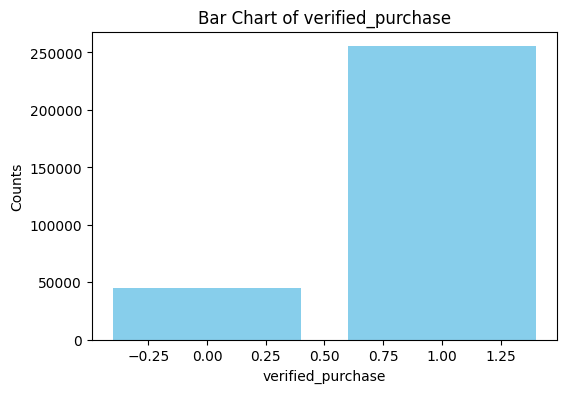

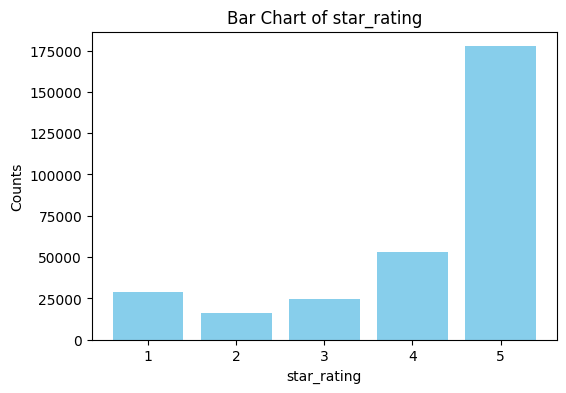

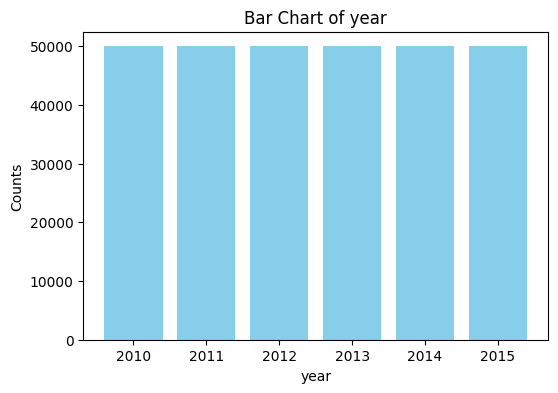

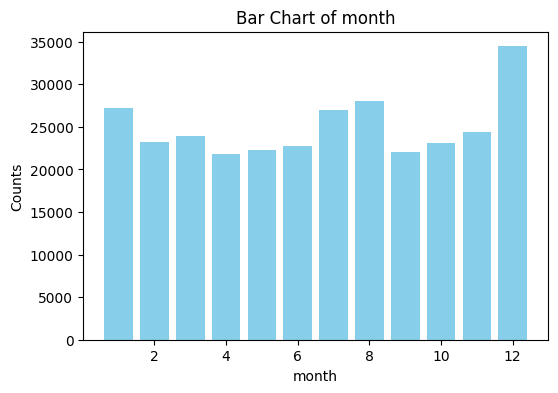

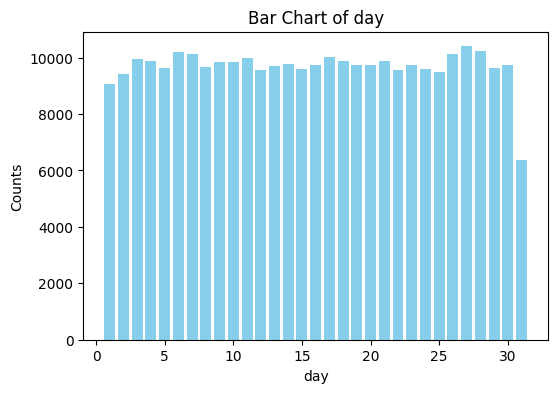

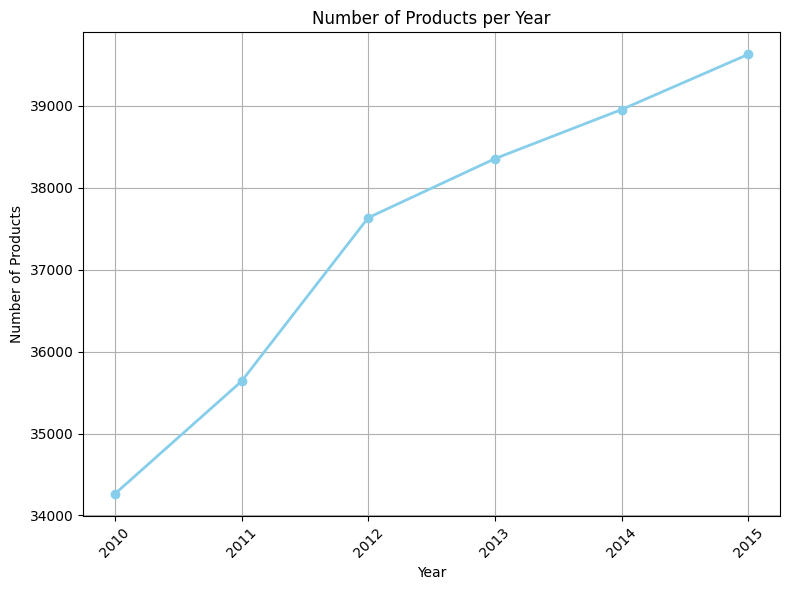

In [37]:
# Create bar chart of columns
# Define help function
def bar_col(column):
  plt.figure(figsize=(6, 4))
  plt.bar(combined_df[column].value_counts().index, combined_df[column].value_counts().values, color='skyblue')
  # Add title and labels
  plt.title(f'Bar Chart of {column}')
  plt.xlabel(f'{column}')
  plt.ylabel('Counts')
  plt.show()
col_list = ['verified_purchase', 'star_rating', 'year', 'month', 'day']
## Use help function to create bar charts
for column in col_list:
  bar_col(column)

#number of products per year
products_per_year = combined_df.groupby('year')['product_id'].nunique().reset_index(name='num_products')

plt.figure(figsize=(8, 6))
plt.plot(products_per_year['year'], products_per_year['num_products'], marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Number of Products')
plt.title('Number of Products per Year')
plt.grid(True)
plt.xticks(products_per_year['year'], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
'''
Most of the graphs were pretty standard and expected. However, three of the graphs show some interesting results.

First it is interesting that there is an overwhelming majority of verified reviewed.
Logically, this would imply that most reviews are real and verified by Amazon.

Secondly, it is interesting that majority of all reviews are 4 or 5 stars.
This could be because people tend be generous with their ratings or it could imply that ratings are being inflated.
That could be due to fake reviews.

Lastly, it is also interesting that the number of products keep increasing each year.
This could be an indication of Amazon's growth as a company or maybe even a rise in fake reviews for obscure products.
'''

## Section 2.2: Analysis on numerical columns

This section is a more indepth look at our data and aims to answer some more important questions that pertain to our goal. This section will require more indepth computation.


Aggregation of our data would produce some important numerical data. These are common metrics that could be a helpful indication for review quality.

1. Total number of reviews for each aggregation

2. The average star rating per review

3. The average number of helpful votes per review

4. The average number of total votes per review

5. The percentage of helpful votes

6. The total number of verified purchased reviews

7. The percentage of verified purchases

In [38]:
def get_relevant_data(df, metric):
  f'''
  Output data columns:
  1) {metric}
  2) average_star_rating
  3) average_helpful_votes
  4) average_total_votes
  5) ratio_of_helpful_votes
  6) total_verified_purchases
  7) ratio_of_verified_purchases
  '''

  # Input sql query
  query = f'''
  SELECT
    {metric},
    COUNT(star_rating) AS total_reviews,
    AVG(star_rating) AS average_star_rating,
    AVG(helpful_votes) AS average_helpful_votes,
    AVG(total_votes) AS average_total_votes,
    AVG(
      CASE
        WHEN total_votes > 0
        THEN helpful_votes * 1.0 / total_votes
        ELSE 0
      END) AS ratio_of_helpful_votes,
    SUM(verified_purchase) AS total_verified_purchases,
    (SUM(verified_purchase) * 1.0 / COUNT(star_rating)) AS ratio_of_verified_purchases
  FROM
    df
  GROUP BY
    {metric}
  ORDER BY
    {metric} ASC
  '''
  query_df = ps.sqldf(query, locals())
  return query_df

In [39]:
# Plot a bar chart comparing each column in the dataframe
def plot_bar_charts(df, column, title, figsize, xlabel=None):
  # Loop through the columns and create a bar chart for each column
  columns = [col for col in df.columns if col != column]
  for col in columns:
    plt.figure(figsize=figsize)
    # Create the bar chart for the current metric
    sns.barplot(
      data=df,
      x=column,
      y=col
    )

    plt.title(f'{col.replace("_", " ").title()} for {title}', fontsize=16)
    if xlabel:
      plt.xlabel(xlabel, fontsize=14)
    else:
      plt.xlabel(f'{column.replace("_", " ").title()}', fontsize=14)
    plt.ylabel(col.replace("_", " ").title(), fontsize=14)

    plt.show()
    print()

The first aspect to consider when looking at the quality of a review is to look at is the customer making the review. The customer could be one of the best indicators of whether or not the review is fake. For example, if the customer is a known troll, then the review has a high chance of being a fake review.

In [ ]:
# Get all of the relevant data for each customer
def get_customer_data(df):
  customer_df = get_relevant_data(df, 'customer_id')
  return customer_df

customers_df = get_customer_data(combined_df)
print(customers_df.describe())

        customer_id  total_reviews  average_star_rating  \
count  2.794350e+05  279435.000000        279435.000000   
mean   2.840119e+07       1.073595             4.110547   
std    1.486291e+07       0.395212             1.311810   
min    1.010400e+04       1.000000             1.000000   
25%    1.519696e+07       1.000000             4.000000   
50%    2.719550e+07       1.000000             5.000000   
75%    4.229042e+07       1.000000             5.000000   
max    5.309657e+07      42.000000             5.000000   

       average_helpful_votes  average_total_votes  ratio_of_helpful_votes  \
count          279435.000000        279435.000000           279435.000000   
mean                2.171592             2.820301                0.332440   
std                16.813260            18.452141                0.432536   
min                 0.000000             0.000000                0.000000   
25%                 0.000000             0.000000                0.000000   
50%   

In [ ]:
'''
In reality using customer data would be a great way to find out whether a review is fake or not.
However, in this scenario customer data is hard to use.
This is because our dataset has 300,000 reviews and there are 279,435 customers.
This means that most of the customers only made 1 review in this dataset and have very similar data.
Therefore, there is not enough data for each customer to make any proper correlations.
'''

We hypothesize that a review from a verified purchase would be more reliable than a review without a verified purchase. Therefore, the next goat is to compare the average star rating, difference in total votes and helpful votes between verified and unverified reviews.

In [ ]:
# Get the relevant data for verified vs unverified purchases
def get_verified_purchases_data(df):
  '''
  Output data columns:
  1) verified_purchase
  2) average_star_rating
  3) average_helpful_votes
  4) average_total_votes
  5) ratio_of_helpful_votes
  '''

  # Input sql query
  query = '''
  SELECT
    CASE
      WHEN verified_purchase == true
      THEN "Verified"
      ELSE "Unverified"
      END AS verified_purchase,
    COUNT(star_rating) AS total_reviews,
    AVG(star_rating) AS average_star_rating,
    AVG(helpful_votes) AS average_helpful_votes,
    AVG(total_votes) AS average_total_votes,
    AVG(
      CASE
        WHEN total_votes > 0
        THEN helpful_votes * 1.0 / total_votes
        ELSE 0
      END) AS ratio_of_helpful_votes
  FROM
    df
  GROUP BY
    verified_purchase
  '''
  query_df = ps.sqldf(query, locals())
  return query_df

verified_purchases_df = get_verified_purchases_data(combined_df)
print(verified_purchases_df.head())

  verified_purchase  total_reviews  average_star_rating  \
0        Unverified          44630             3.752924   
1          Verified         255370             4.181807   

   average_helpful_votes  average_total_votes  ratio_of_helpful_votes  
0               4.997042             6.695026                0.440655  
1               1.788581             2.272319                0.318986  


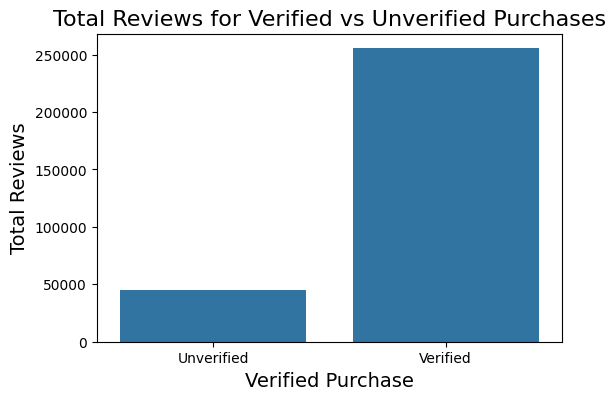

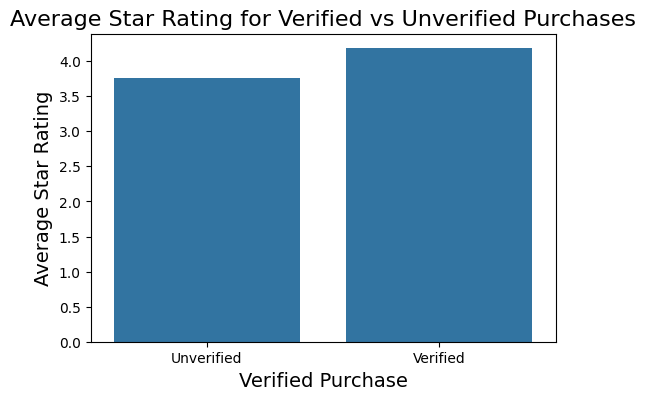

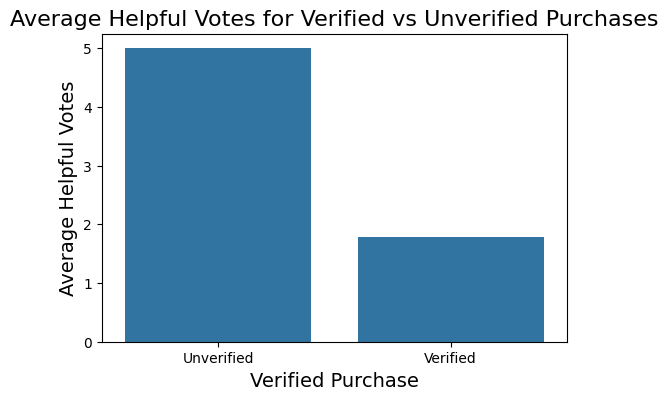

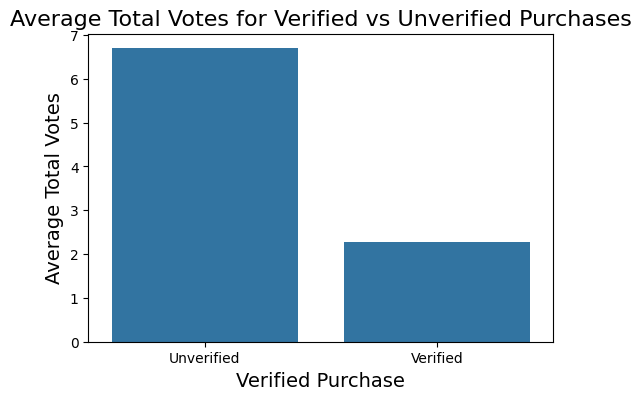

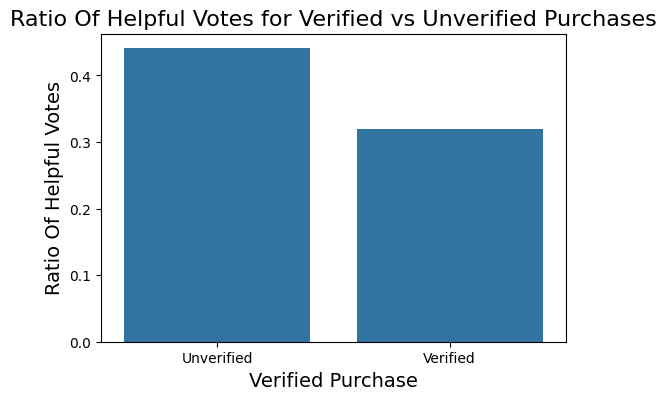

In [ ]:
# Plot a bar chart comparing each column in the verified purchases dataframe
def plot_bar_charts_verified_purchases(df):
  plot_bar_charts(df, 'verified_purchase', 'Verified vs Unverified Purchases', (6, 4))

plot_bar_charts_verified_purchases(verified_purchases_df)

In [ ]:
# Explanation of results
'''
Initially, we did not expect to see any difference in the average star rating between both purchases.
The data reflects this result since both groups have relatively equal average ratings.
However, we did expect that verified purchases would have more helpful votes if not a higher ratio of helpful votes.
Theoretically have a higher credibility since it guarantees the person at least bought the product and has experienced the product.
Surprisingly, the data shows the opposite result. One possible explanation is that there are many more verified purchases.
Most purchases do not have any votes, so having more reviews would naturally lower the average helpful votes.

While this metric is theoretically important for determine the review quality, the data makes us question whether we should use it for our models.
'''

Another imporant factor to consider when looking at reviews is the length of a review. To do this we can compare the length of a review to its average star rating, total helpful votes and total votes.

In [ ]:
# Get all of the relevant data for each review length block
def get_review_length_data(df):
  # Grouping by length of the review would be too much, instead we can group by different length chunks.
  # We can consider 100 characters to be proper block size
  # First transform the df to get each review's block size
  def get_review_block(x, block_size):
    if x >= block_size * 9:
      return f'{block_size * 9}+'
    else:
      return f'{int(x / block_size) * block_size} - {int(x / block_size) * block_size + (block_size - 1)}'

  len_df = df
  len_df['review_length'] = len_df['review_body'].apply(
    lambda x: get_review_block(len(x), 100)
  )

  review_length_df = get_relevant_data(len_df, 'review_length')
  return review_length_df

review_length_df = get_review_length_data(combined_df)
review_length_df.head(10)

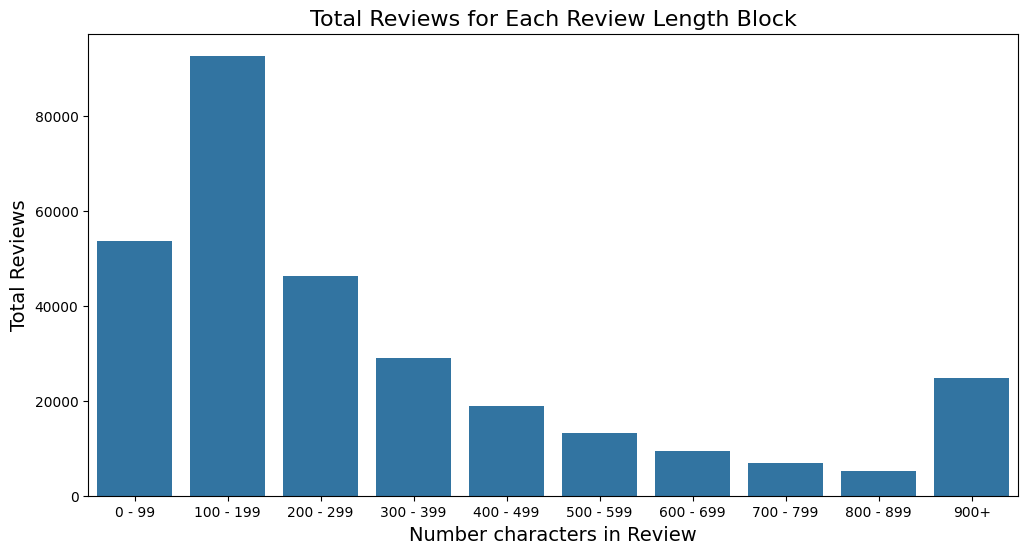

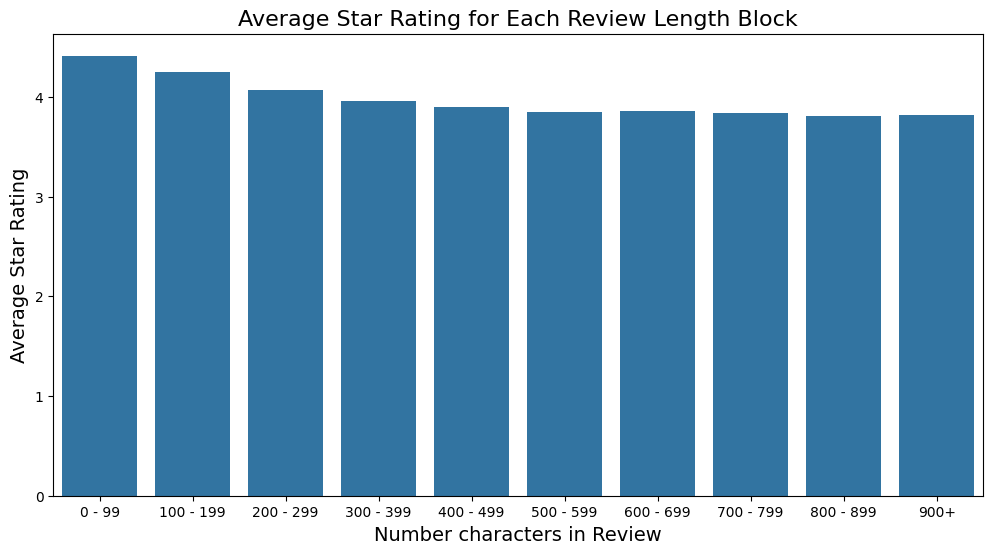

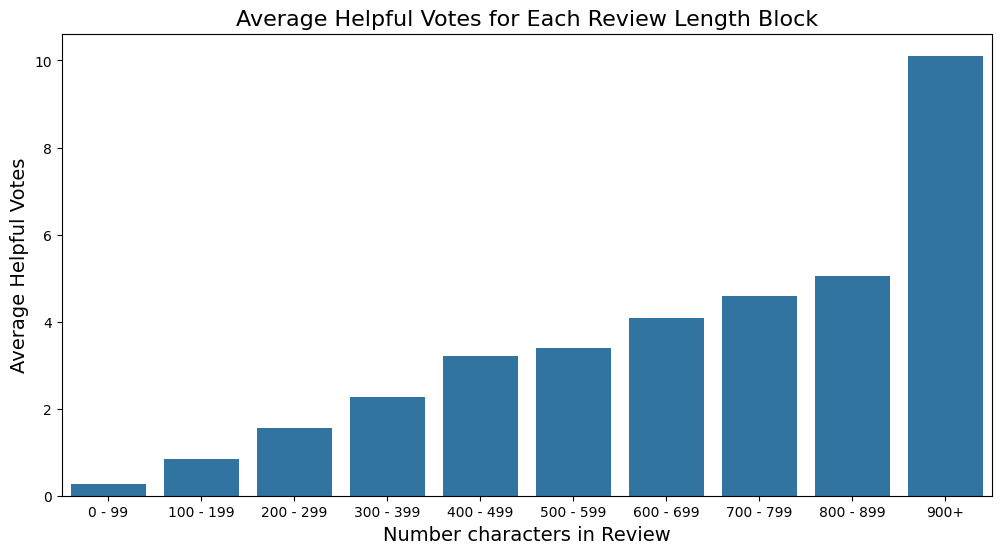

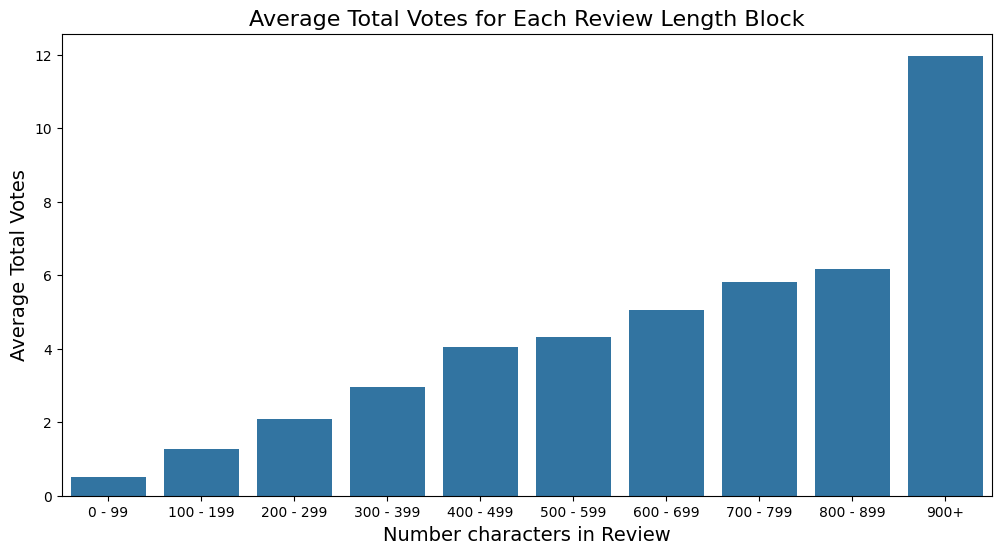

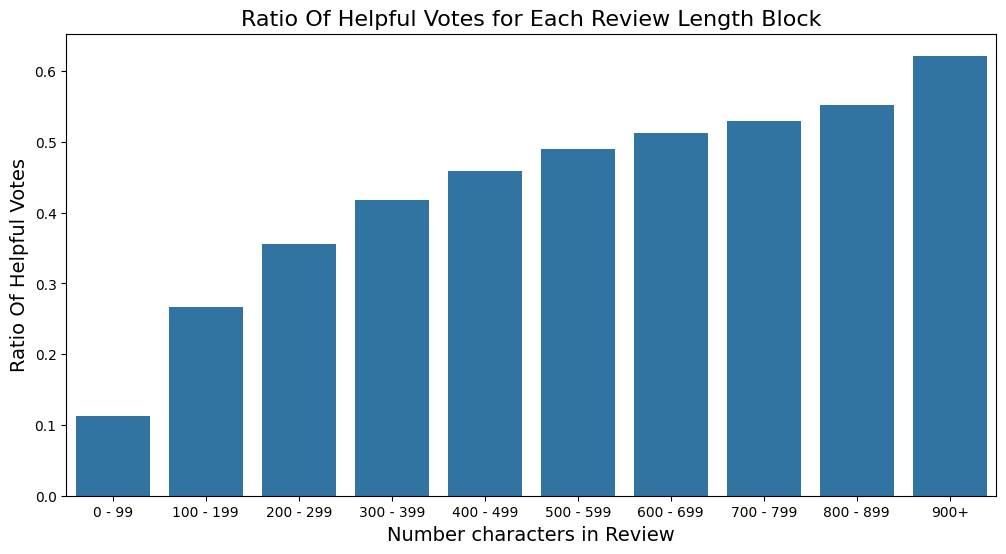

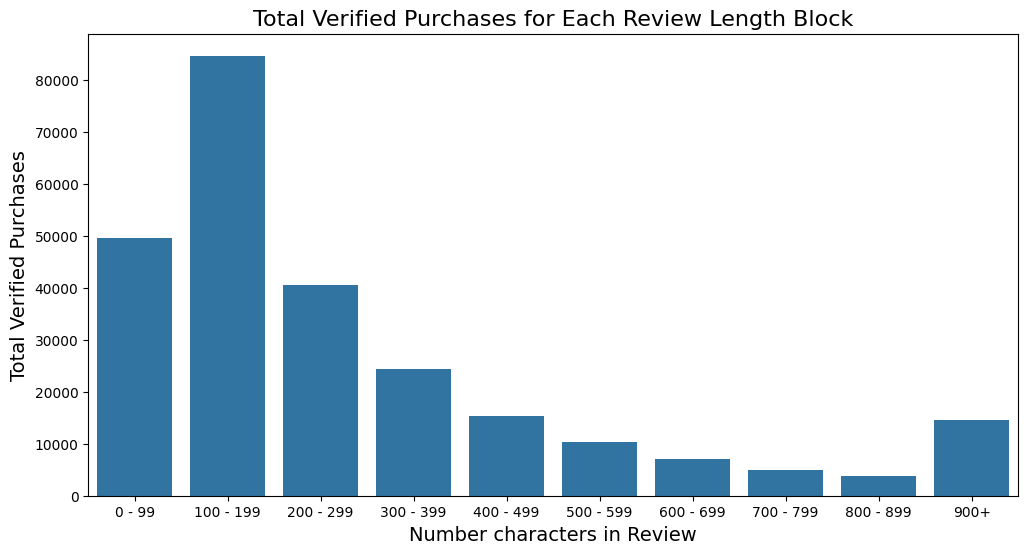

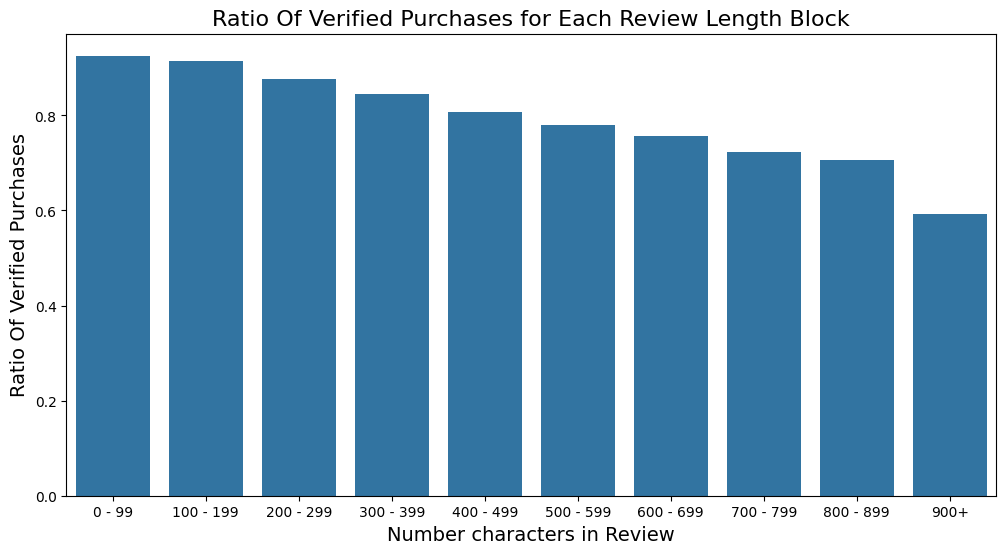

In [ ]:
# Plot a bar chart comparing each column in the review_length dataframe
def plot_bar_charts_review_length(df):
  plot_bar_charts(df, 'review_length', 'Each Review Length Block', (12, 6), xlabel='Number characters in Review')

plot_bar_charts_review_length(review_length_df)

In [ ]:
'''
The results have generally supported our initial beliefs. A longer review should theoretically be more comprehensive and useful.
The data shows that longer reviews have more helpful votes and a higher percentage of helpful votes.
Additionally, it is important to note that majority of all reviews are less than 300 characters.
This means that review length might not be as useful when analyzing short reviews, but it could be much more useful for longer reviews.
'''

One more interesting question would be explore how has reviews changed and whether or not fake reviews have been more or less common over time.  

In [ ]:
def get_year_reviews(df):
  year_df = get_relevant_data(df, 'year')
  return year_df

year_df = get_year_reviews(combined_df)
print(year_df.head(10))

   year  total_reviews  average_star_rating  average_helpful_votes  \
0  2010          50000              3.99562                4.43784   
1  2011          50000              4.01232                3.48750   
2  2012          50000              4.06190                2.80544   
3  2013          50000              4.16604                1.43144   
4  2014          50000              4.21524                0.83414   
5  2015          50000              4.25690                0.59900   

   average_total_votes  ratio_of_helpful_votes  total_verified_purchases  \
0              5.52284                0.493582                     38224   
1              4.44726                0.463542                     39684   
2              3.57810                0.381462                     41625   
3              1.96178                0.292462                     45505   
4              1.20988                0.219062                     43296   
5              0.86176                0.172410       

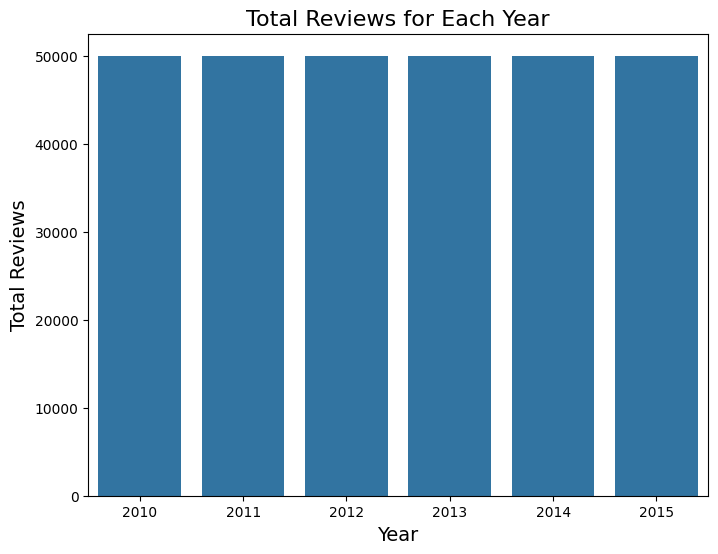

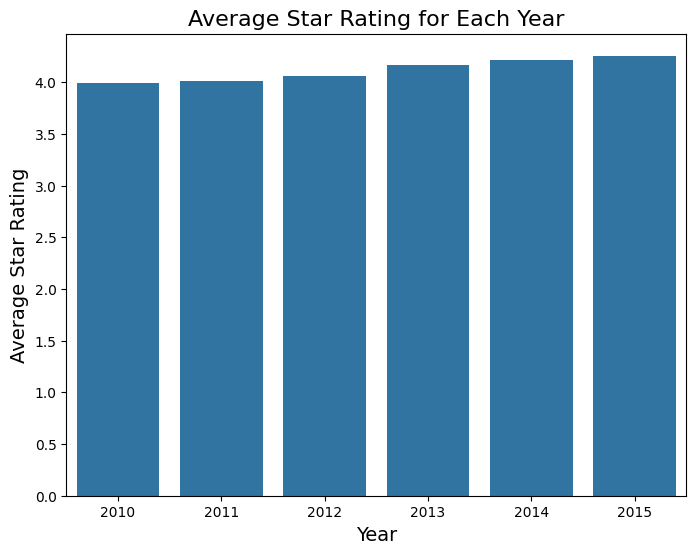

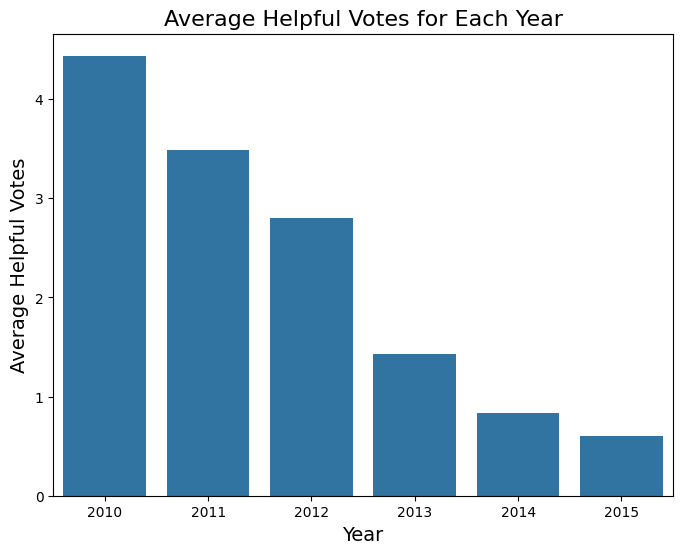

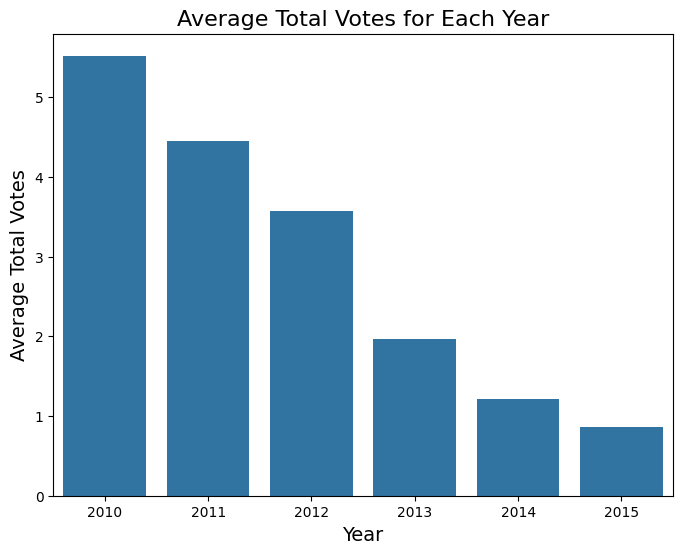

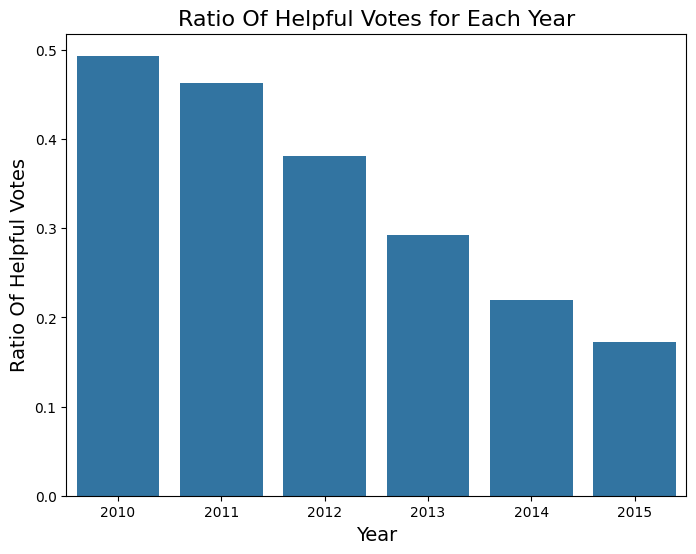

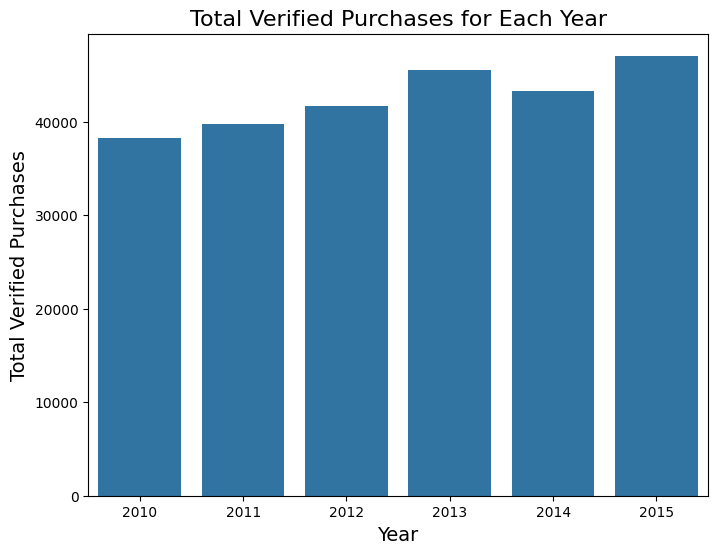

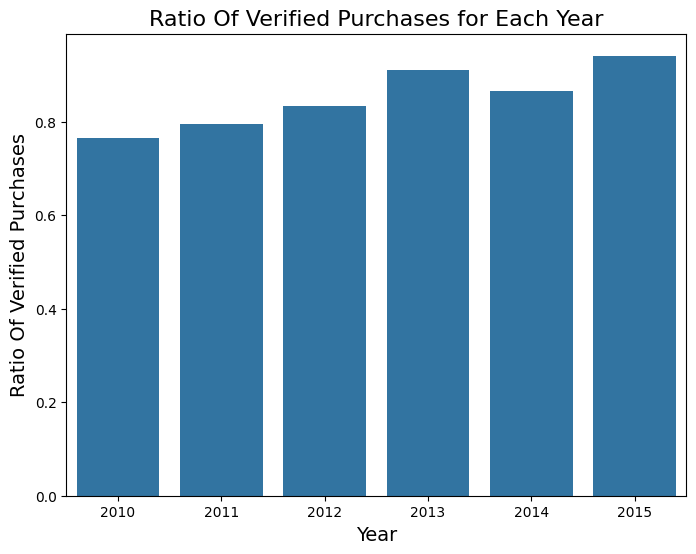

In [ ]:
def plot_bar_charts_years(df):
  plot_bar_charts(df, 'year', 'Each Year', (8, 6))

plot_bar_charts_years(year_df)

In [ ]:
'''
We did not expect to see any real differences between each year.
For most of the metrics this was true, but there was a trend that each the number votes and helpful consistently decreased
'''

## Section 2.3: Sentiment Analysis

After looking at purely the numerical data (star rating, helpful votes and etc.), it is also important to analyze the text of the review. Calculating and analyzing the sentiment of the review is also very important when trying to understand fake reviews.

In [ ]:
SIA = SentimentIntensityAnalyzer()

def get_vader_scores(text):
    """
    Calculate VADER sentiment scores for a given text and return individual components.

    Parameters:
        text (str): Input text for sentiment analysis.

    Returns:
        tuple: Positive, Neutral, Negative, and Compound sentiment scores.
    """
    # Get sentiment scores
    scores = SIA.polarity_scores(text)

    # Parse scores into variables
    positive = scores['pos']
    neutral = scores['neu']
    negative = scores['neg']
    compound = scores['compound']

    return positive, neutral, negative, compound

def add_vader_scores_for_columns(df, text_columns):
    """
    Apply VADER sentiment analysis to multiple text columns in a DataFrame
    and add corresponding sentiment score columns.

    Parameters:
        df (pd.DataFrame): The DataFrame containing text columns.
        text_columns (list): List of column names with text to analyze.

    Returns:
        pd.DataFrame: The DataFrame with added sentiment score columns.
    """
    for col in text_columns:
        # Apply get_vader_scores and create new columns for each score
        df[[f'{col}_positive', f'{col}_neutral', f'{col}_negative', f'{col}_compound']] = (
            df[col].apply(lambda x: SIA.polarity_scores(str(x))).apply(pd.Series)
        )
    return df

In [ ]:
# An example of using VADER score
text = "I absolutely love this product! It's amazing."
SIA = SentimentIntensityAnalyzer()
scores = SIA.polarity_scores(text)
print(scores)

text = "Five Stars"
text = "One Stars"
SIA = SentimentIntensityAnalyzer()
scores = SIA.polarity_scores(text)
print(scores)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.862}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [ ]:
# text_columns_VADAR = ['review_headline', 'review_body']
# text_columns_VADAR = ['review_headline']
### Getting the VADAR scores takes too much time for review_body.
### For 300K observation, it takes 7 mins.
text_columns_VADAR = ['review_body']
combined_df = add_vader_scores_for_columns(combined_df, text_columns_VADAR)
combined_df

marketplace  customer_id       review_id  product_id  product_parent  \
0               US     51086982  R1OJLGJWROT0Y4  B002XJQVM2       219579233   
1               US     51148531  R3F1OFZ57MLTPZ  B0007DHU0S       411582542   
2               US     48710875   RXCSVF3NNCH8L  B002KGV3C6       573381303   
3               US     36506657  R1L4S60NHP1M5V  B001167XXY       267973018   
4               US     24139977  R2MDQM6YOGPEZE  B001P80EOI       834146694   
...            ...          ...             ...         ...             ...   
299995          US     20091937   RG3OEOSY8E9BB  B0058YRS7Q       942678333   
299996          US     42707077  R3BPWFN2BN6XJ8  B00GUKMXMM       535582414   
299997          US     34330814  R15S00RV8LYDVU  B00509V9OC       345780145   
299998          US     10566115  R31O5A7QGHES8B  B006VPPERC       417095935   
299999          US     16352522  R37KUHYLOYF1X9  B0055P25QW       805929113   

                                            product_title product_category  \
0       Averyamp;reg; Easy Peel Address Labels for Las...  Office Products   
1       Learning Resources Time Tracker Visual Timer &...  Office Products   
2       Sony PCM-M10 Portable Linear PCM Voice Recorde...  Office Products   
3       Genuine Brother TN-360 High Yield Black Toner ...  Office Products   
4       Panasonic Dect 6.0 Dark Grey Cordless Phone wi...  Office Products   
...                                                   ...              ...   
299995               Columbia Sun Goddess Booney Sun Hats         Outdoors   
299996                        Metolius Screw-On Footholds         Outdoors   
299997  Smartwool Women's Lifestyle Cable Socks - Past...         Outdoors   
299998  Ultrafire® Cree 7W 300LM Mini LED One Mode Fla...         Outdoors   
299999                         ZÜM CX Wooden Balance Bike         Outdoors   

        star_rating  helpful_votes  total_votes  ...  year  month day  \
0                 5              0            0  ...  2010      8   2   
1                 4              2            2  ...  2010      4  13   
2                 4             10           10  ...  2010     10   9   
3                 5              0            0  ...  2010      5   3   
4                 4             13           13  ...  2010      2   7   
...             ...            ...          ...  ...   ...    ...  ..   
299995            5              0            0  ...  2015      1   5   
299996            3              0            3  ...  2015      1   4   
299997            1              4            4  ...  2015      2   7   
299998            2              0            0  ...  2015      2  12   
299999            5              0            0  ...  2015      6   4   

       day_of_week                               review_headline_text  \
0           Monday  ['Free', 'Software', 'Makes', 'the', 'Labels',...   
1          Tuesday  ['not', 'fun', 'to', 'set', 'up', ',', 'but', ...   
2         Saturday  ['Amazingly', 'high', 'quality', 'for', 'price...   
3           Monday  ['Brother', 'printers', 'seem', 'to', 'like', ...   
4           Sunday                        ['Great', 'basic', 'phone']   
...            ...                                                ...   
299995      Monday                                  ['Five', 'Stars']   
299996      Sunday  ['fast', 'shipping', 'but', 'only', 'decent', ...   
299997    Saturday  ['What', 'happened', ',', 'Smartwool', '?', '?...   
299998    Thursday           ['Ca', "n't", 'recommend', 'these', '.']   
299999    Thursday                                  ['Five', 'Stars']   

                                         review_body_text  \
0       ['Our', 'town', "'s", 'energy', 'committee', '...   
1       ['We', 'use', 'this', 'to', 'keep', 'our', 'fo...   
2       ['As', 'purchase', 'very', 'good', '-', 'it', ...   
3       ['Works', 'fine', '-', 'as', 'I', 'expected', ...   
4       ['If', 'you', "'re", 'looking', 'for', 'a', 'b...   
.

In [ ]:
def compute_correlations(df, target_col, sentiment_columns):
    """
    Compute correlations between the target column and specified score columns.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        target_col (str): The name of the target column (e.g., 'star_rating').
        sentiment_columns (list): List of sentiment score columns to correlate with.

    Returns:
        pd.Series: Correlations between the target column and each sentiment column.
    """
    return df[[target_col] + sentiment_columns].corr()[target_col][1:]

In [ ]:
sentiment_columns = ['review_body_positive', 'review_body_negative', 'review_body_neutral', 'review_body_compound']
correlations = compute_correlations(combined_df, 'star_rating', sentiment_columns)
print(correlations)

review_body_positive   -0.362602
review_body_negative    0.374267
review_body_neutral    -0.258652
review_body_compound    0.494274
Name: star_rating, dtype: float64


In [ ]:
### Create help function for bar chart by group
def create_grouped_bar_charts(dataframe, columns, group_by_column):
    """
    Creates bar charts for each column in the list, grouped by another column.

    Parameters:
    - dataframe (pd.DataFrame): The data source.
    - columns (list of str): List of column names to create bar charts for.
    - group_by_column (str): The column to group data by.

    Returns:
    None. Displays the bar charts.
    """
    for col in columns:
        if col not in dataframe.columns or group_by_column not in dataframe.columns:
            print(f"Skipping {col} as it or {group_by_column} is not in the dataframe.")
            continue

        grouped_data = dataframe.groupby(group_by_column)[col].mean()  # Aggregate data by mean
        grouped_data.plot(kind='bar', figsize=(8, 6))

        plt.title(f'Bar Chart of {col} Grouped by {group_by_column}')
        plt.xlabel(group_by_column)
        plt.ylabel(f'Average {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

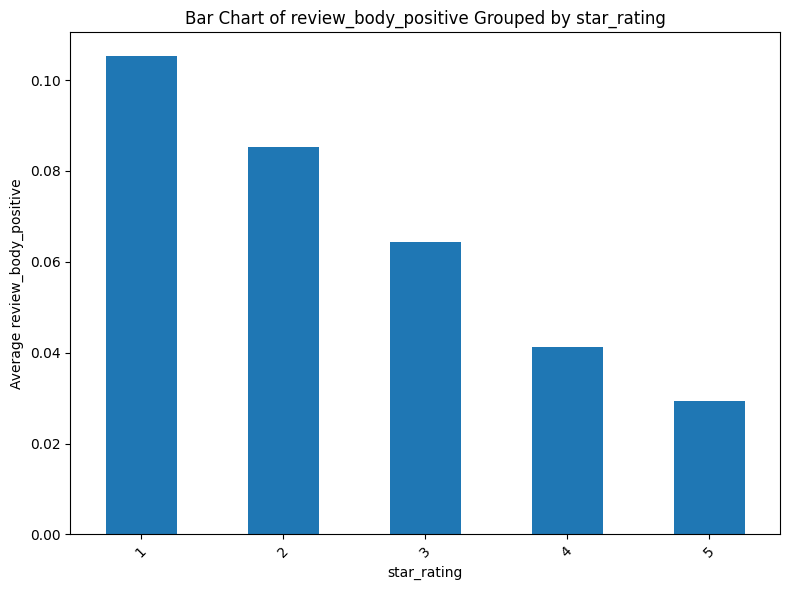

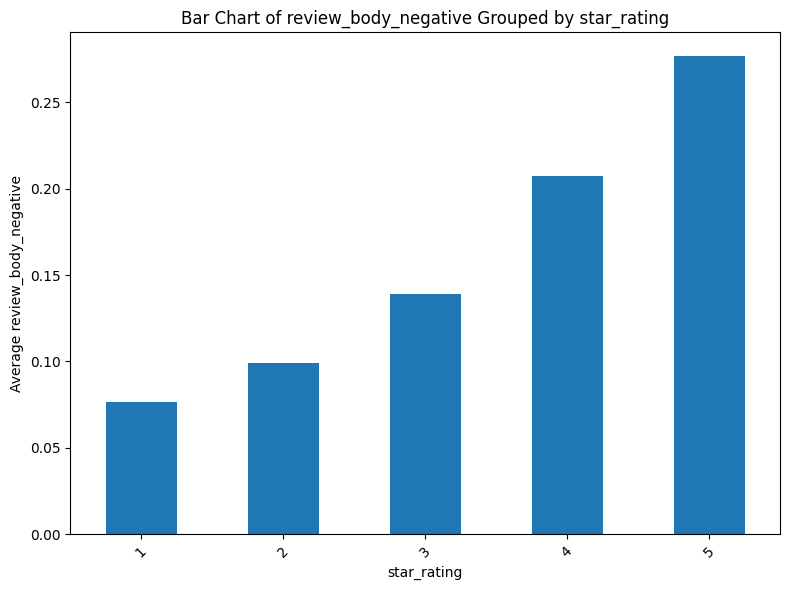

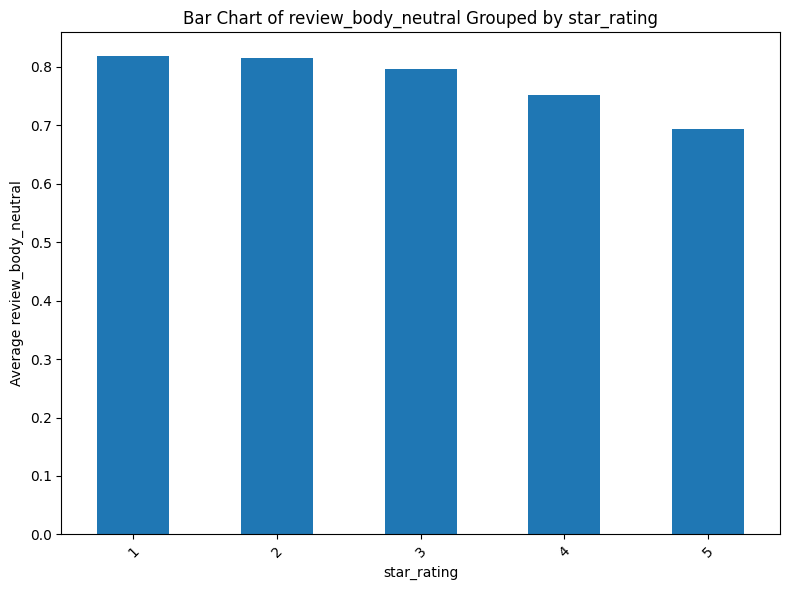

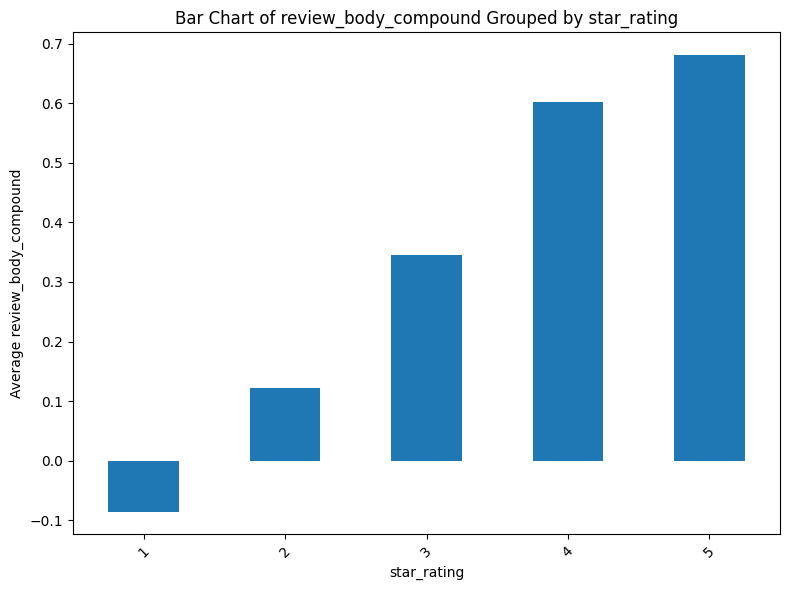

In [ ]:
create_grouped_bar_charts(combined_df, sentiment_columns, 'star_rating')

### Section 2.3.2 Vadar Score Implication

The empirical analysis actually shows unexpected correlation between positive or negative sentiment score with the target star ratings. The coupound sentimental score is moderately correlated (with a correlation coefficient at 49%) with the target star ratings.

This suggests that we should build more reasonable models to predict star_rating instead of just using Vadar scoring. The coupound sentimental score is expected be an important feature in the model.

In [ ]:
### Correlation of Vedar Scores of review headline with star_rating
sentiment_columns = ['review_headline_positive', 'review_headline_negative', 'review_headline_neutral', 'review_headline_compound']
correlations = compute_correlations(combined_df, 'star_rating', sentiment_columns)
print(correlations)

review_headline_positive   -0.406442
review_headline_negative    0.324032
review_headline_neutral    -0.104347
review_headline_compound    0.431020
Name: star_rating, dtype: float64


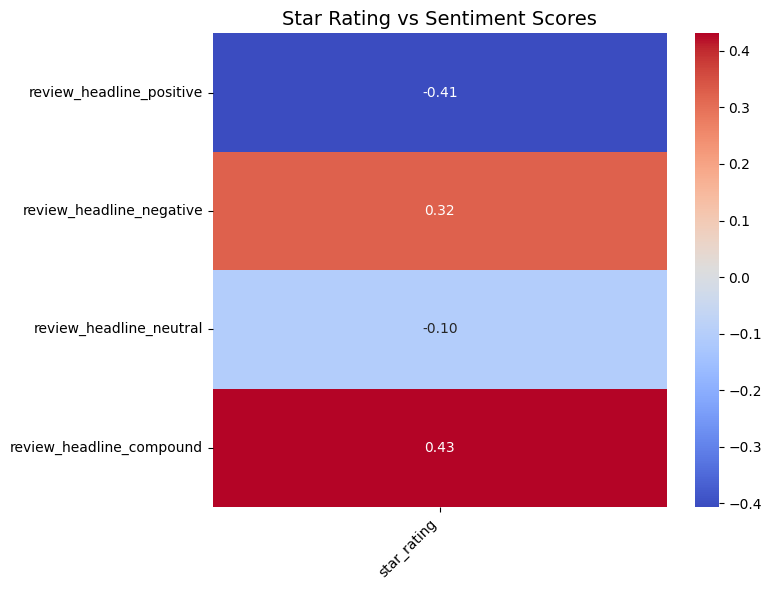

In [ ]:
def plot_correlation_heatmap(correlations, title="Correlation Heatmap", cmap="coolwarm"):
    """
    Plots a heatmap for the given correlations.

    Parameters:
        correlations (pd.Series or pd.DataFrame): Correlation data to plot.
        title (str): Title of the heatmap.
        cmap (str): Color map for the heatmap.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlations.to_frame(),
        annot=True,
        fmt=".2f",
        cmap=cmap,
        cbar=True,
        annot_kws={"size": 10}
    )
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(correlations, title="Star Rating vs Sentiment Scores")

### Section 2.3.3: Word Clouds

Here we displayed the word clouds of the different categories.
We wanted to look at the word clouds because we might want to look at the prescence of a popular word to see if that relates to the review quality.

In [ ]:
def draw_word_cloud(dataframe, column_name, background_color='white', max_words=200, width=800, height=400):
    """
    Generate and display a word cloud from a specific column of a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the text data.
        column_name (str): The name of the column to generate the word cloud from.
        background_color (str): Background color of the word cloud. Default is 'white'.
        max_words (int): Maximum number of words to include in the word cloud. Default is 200.
        width (int): Width of the word cloud image. Default is 800.
        height (int): Height of the word cloud image. Default is 400.

    Returns:
        None: Displays the word cloud plot.
    """
    # Combine all text from the specified column
    text = ' '.join(dataframe[column_name].dropna().astype(str))

    # Create a WordCloud instance
    wordcloud = WordCloud(
        background_color=background_color,
        max_words=max_words,
        width=width,
        height=height
    ).generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column_name}', fontsize=16)
    plt.show()


Word Cloud for category Office Products


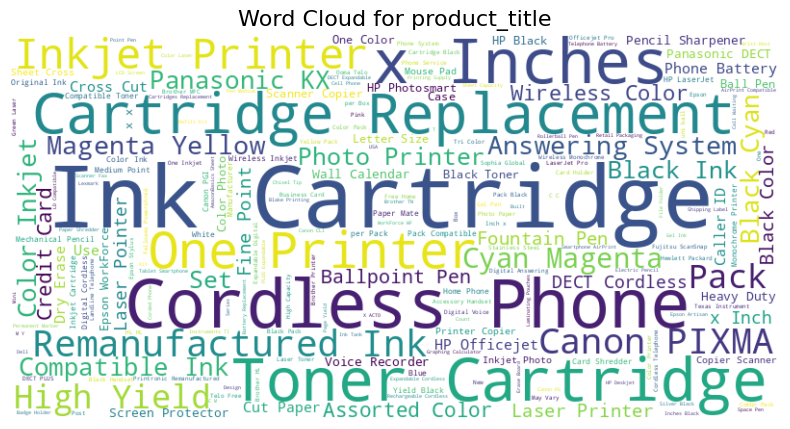

Word Cloud for category Video Games


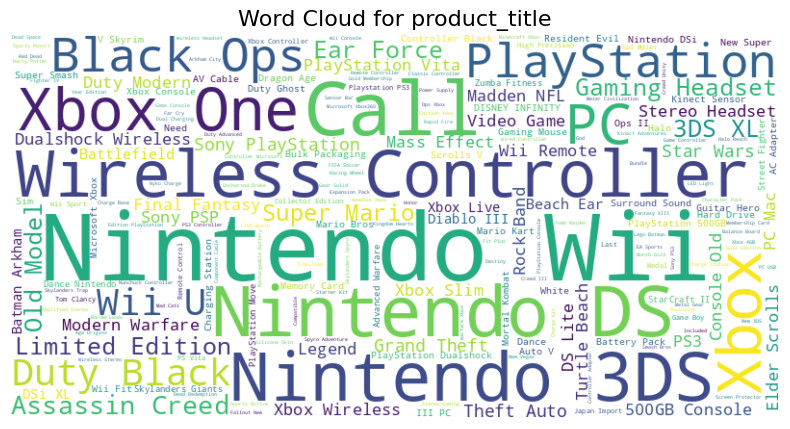

Word Cloud for category Automotive


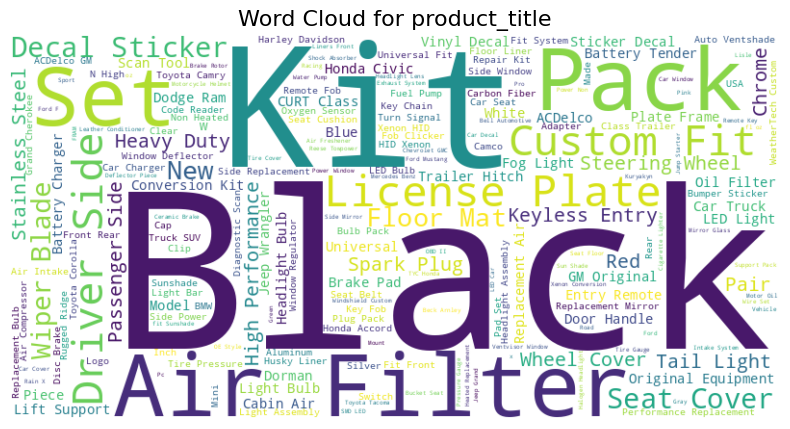

Word Cloud for category Shoes


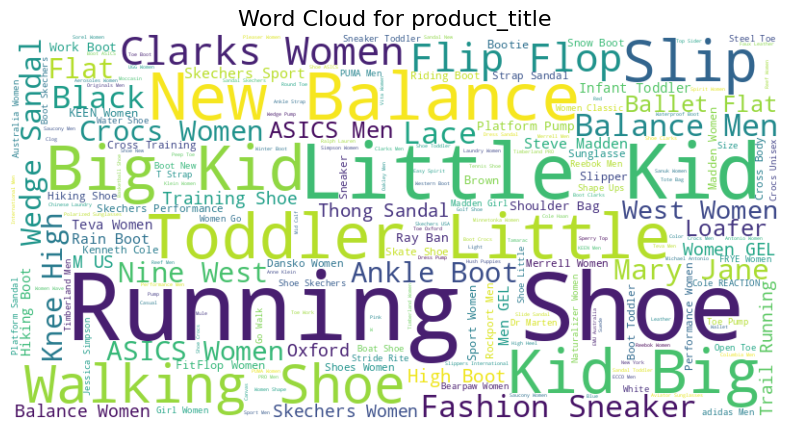

Word Cloud for category Outdoors


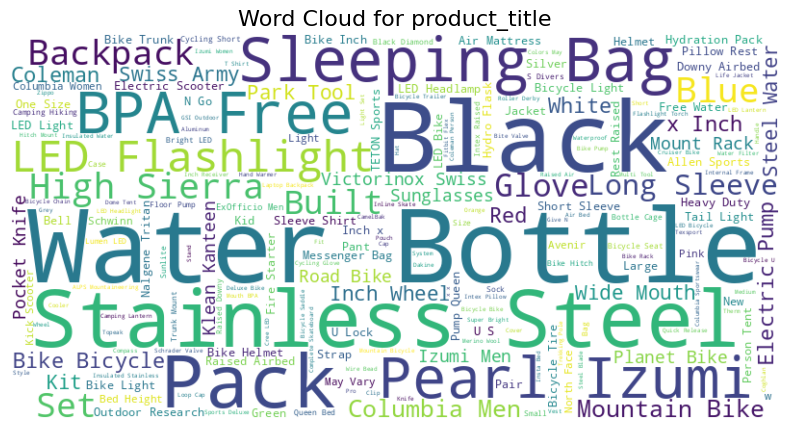

In [ ]:
cat_list = ['Office Products', 'Video Games', 'Automotive', 'Shoes', 'Outdoors']
# df = combined_df[combined_df['product_category'] == 'Office Products']
# df
for cat in cat_list:
  df = combined_df[combined_df['product_category'] == cat]
  print(f"Word Cloud for category {cat}")
  draw_word_cloud(df, 'product_title', background_color='white', max_words=200, width=800, height=400)

Word Cloud for category Office Products


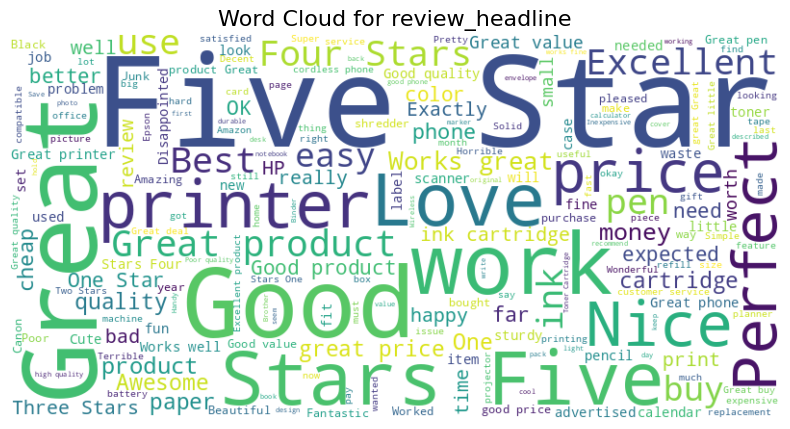

Word Cloud for category Video Games


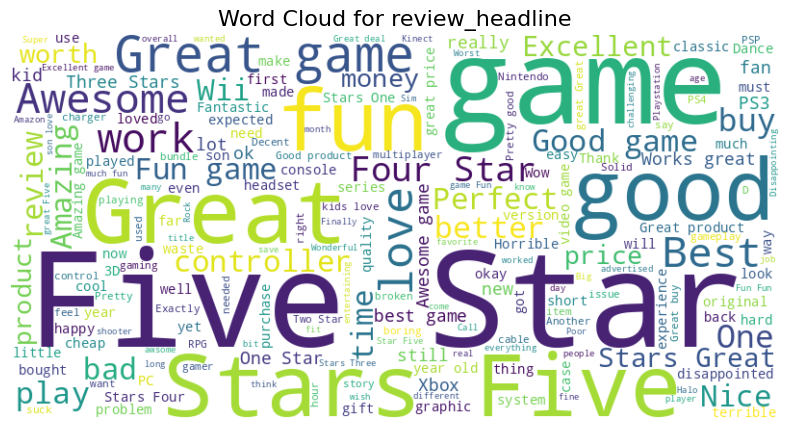

Word Cloud for category Automotive


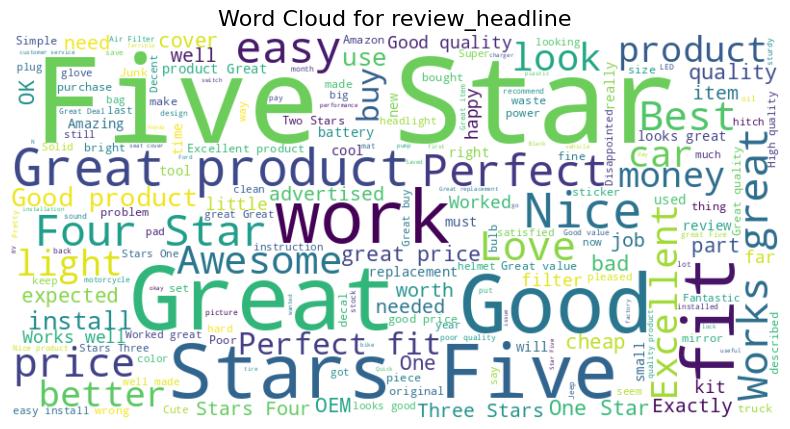

Word Cloud for category Shoes


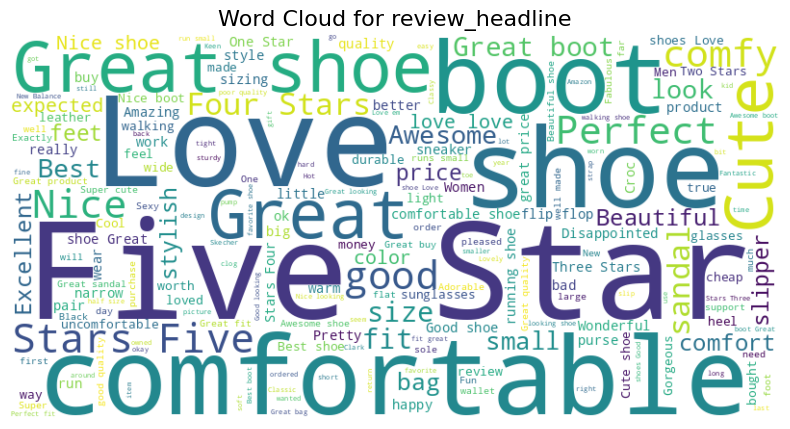

Word Cloud for category Outdoors


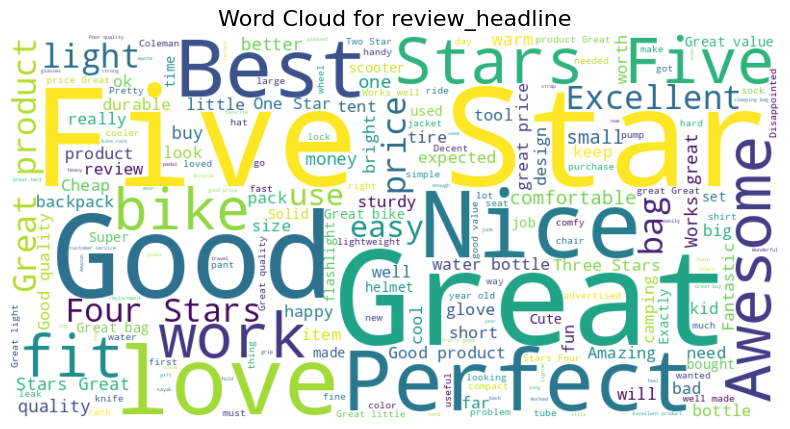

In [ ]:
cat_list = ['Office Products', 'Video Games', 'Automotive', 'Shoes', 'Outdoors']
# df = combined_df[combined_df['product_category'] == 'Office Products']
# df
for cat in cat_list:
  df = combined_df[combined_df['product_category'] == cat]
  print(f"Word Cloud for category {cat}")
  draw_word_cloud(df, 'review_headline', background_color='white', max_words=200, width=800, height=400)

Word Cloud for category Office Products


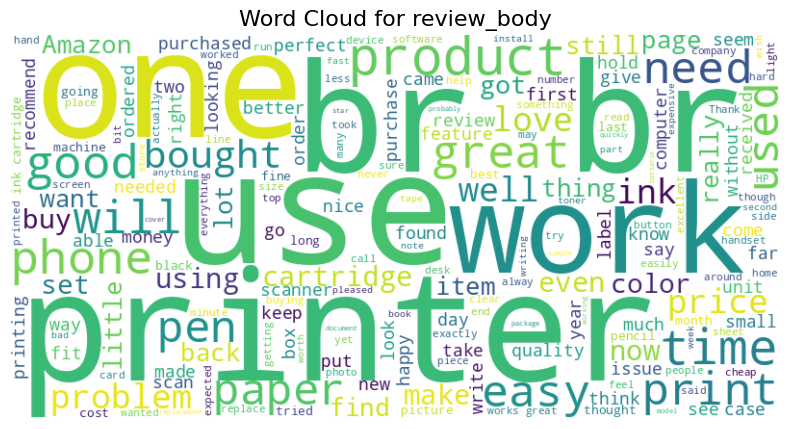

Word Cloud for category Video Games


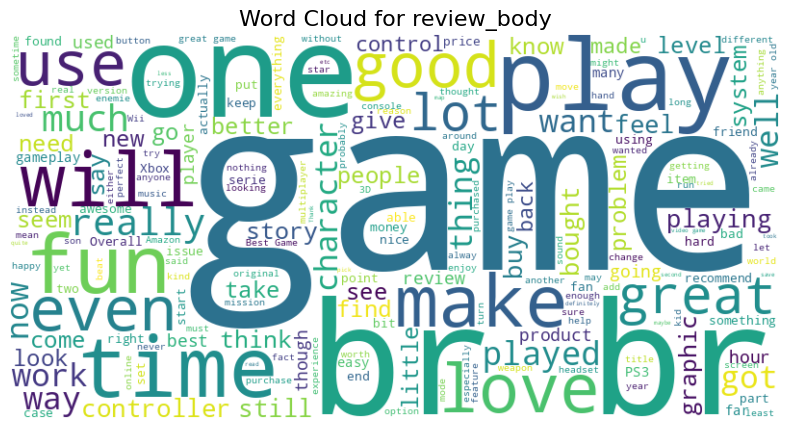

Word Cloud for category Automotive


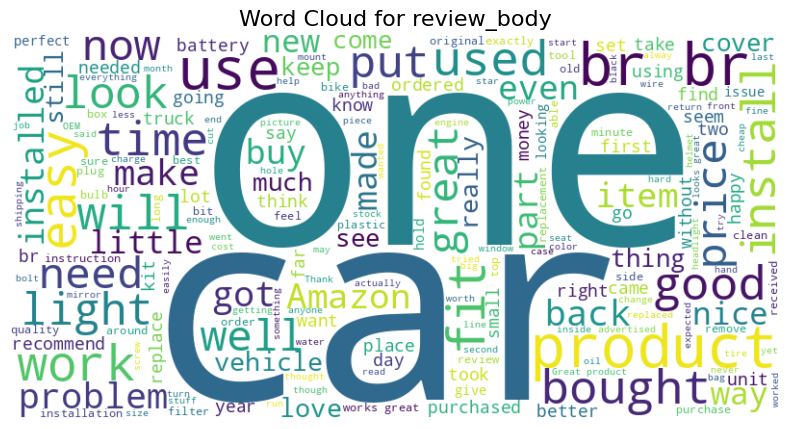

Word Cloud for category Shoes


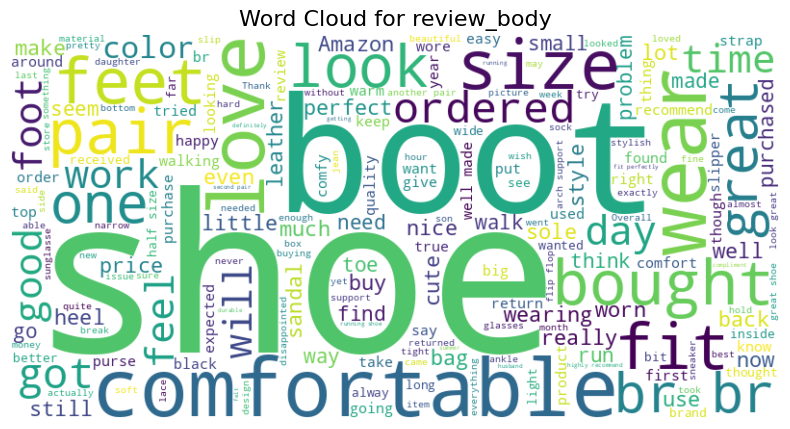

Word Cloud for category Outdoors


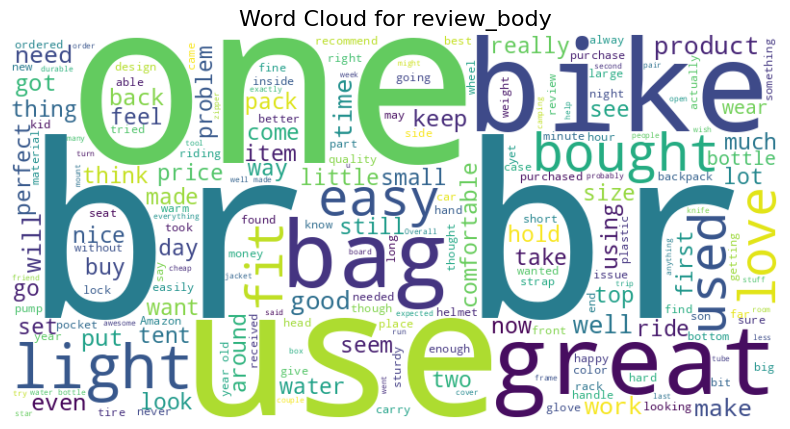

In [ ]:
cat_list = ['Office Products', 'Video Games', 'Automotive', 'Shoes', 'Outdoors']
# df = combined_df[combined_df['product_category'] == 'Office Products']
# df
for cat in cat_list:
  df = combined_df[combined_df['product_category'] == cat]
  print(f"Word Cloud for category {cat}")
  draw_word_cloud(df, 'review_body', background_color='white', max_words=200, width=800, height=400)

NOTE: These word clouds were used purely for understanding. We did not end up using the popular words, but we still kept this here just in case.

# Step 3: Feature engineering

Now that we have explored the data. The next step is to prepare the data so it can be used for models. The main goal would be to create feature columns that are purely numerical so they can be used in the models we employ.

## Step 3.1: Create Features Dataframe

This step creates the features and saves it to a dataframe. Some features to consider are:

* helpful_votes ratio
* review length
* number of special characters
* sentiment, polarity and subjectivity of review
* readability score
* average star rating of a group

In [40]:
### combined_df was created and uploaded from local copy
combined_df = pd.read_csv('combined_df.csv')
combined_df.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     51086982  R1OJLGJWROT0Y4  B002XJQVM2       219579233   
1          US     51148531  R3F1OFZ57MLTPZ  B0007DHU0S       411582542   
2          US     48710875   RXCSVF3NNCH8L  B002KGV3C6       573381303   
3          US     36506657  R1L4S60NHP1M5V  B001167XXY       267973018   
4          US     24139977  R2MDQM6YOGPEZE  B001P80EOI       834146694   

                                       product_title product_category  \
0  Averyamp;reg; Easy Peel Address Labels for Las...  Office Products   
1  Learning Resources Time Tracker Visual Timer &...  Office Products   
2  Sony PCM-M10 Portable Linear PCM Voice Recorde...  Office Products   
3  Genuine Brother TN-360 High Yield Black Toner ...  Office Products   
4  Panasonic Dect 6.0 Dark Grey Cordless Phone wi...  Office Products   

   star_rating  helpful_votes  total_votes  ...  verified_purchase  \
0            5              0            0  ...                  0   
1            4              2            2  ...                  1   
2            4             10           10  ...                  1   
3            5              0            0  ...                  1   
4            4             13           13  ...                  1   

                                     review_headline  \
0                Free Software Makes the Labels Work   
1               not fun to set up, but works wonders   
2    Amazingly high quality for price & compact size   
3  Brother printers seem to like their own produc...   
4                                  Great basic phone   

                                         review_body review_date  year  month  \
0  Our town's energy committee recently had a pro...  2010-08-02  2010      8   
1  We use this to keep our four-year-old on task ...  2010-04-13  2010      4   
2  As purchase very good - it was shipped in incr...  2010-10-09  2010     10   
3  Works fine - as I expected.  Haven't had it lo...  2010-05-03  2010      5   
4  If you're looking for a basic phone that's eas...  2010-02-07  2010      2   

   day  day_of_week                               review_headline_text  \
0    2       Monday  ['Free', 'Software', 'Makes', 'the', 'Labels',...   
1   13      Tuesday  ['not', 'fun', 'to', 'set', 'up', ',', 'but', ...   
2    9     Saturday  ['Amazingly', 'high', 'quality', 'for', 'price...   
3    3       Monday  ['Brother', 'printers', 'seem', 'to', 'like', ...   
4    7       Sunday                        ['Great', 'basic', 'phone']   

                                    review_body_text  
0  ['Our', 'town', "'s", 'energy', 'committee', '...  
1  ['We', 'use', 'this', 'to', 'keep', 'our', 'fo...  
2  ['As', 'purchase', 'very', 'good', '-', 'it', ...  
3  ['Works', 'fine', '-', 'as', 'I', 'expected', ...  
4  ['If', 'you', "'re", 'looking', 'for', 'a', 'b...  

[5 rows x 21 columns]

Here we created a function for each feature we wanted to add. Each function will create a new column accordingly.

In [41]:
# Do one hot encoding on 'product_category' so it can be used as a feature
def change_product_category_to_num(df):
  df = pd.get_dummies(df, columns=['product_category'], dtype=int)
  return df

# Add a column that shows the ratio of helpful votes to total votes
def add_helpful_votes_ratio(df):
  df['helpful_votes_ratio'] = (
      df['helpful_votes'] / df['total_votes']
    ).fillna(0)
  return df

# Add a column that shows the length of a review headline
def add_char_count_headline(df):
  df['char_count_headline'] = df['review_headline'].apply(
    lambda x: len(x)
  )
  return df

# Add a column that shows the length of a review body
def add_char_count_body(df):
  df['char_count_body'] = df['review_body'].apply(
    lambda x: len(x)
  )
  return df

# Add a column that shows the number of words in a review headline
def add_word_count_headline(df):
  df['word_count_headline'] = df['review_headline'].apply(
    lambda x: len(x.split())
  )
  return df

# Add a column that shows the number of words in a review body
def add_word_count_body(df):
  df['word_count_body'] = df['review_body'].apply(
    lambda x: len(x.split())
  )
  return df

# Add a column that shows the number of sentences in a review headline
def add_sen_count_headline(df):
  df['sen_count_headline'] = df['review_headline'].apply(
    lambda x: len([s for s in re.split(r'[.!?]+', x) if s.strip()])
    )
  return df

# Add a column that shows the number of sentences in a review body
def add_sen_count_body(df):
  df['sen_count_body'] = df['review_body'].apply(
    lambda x: len([s for s in re.split(r'[.!?]+', x) if s.strip()])
    )
  return df

# Add a column that shows the count of characters that are capitalized in review_headline
def add_capitalization_count_headline(df):
  df['capitalization_count_headline'] = df['review_headline'].apply(
    lambda x: sum(1 for char in x if char.isupper())
  )
  return df

# Add a column that shows the count of characters that are capitalized in review_body
def add_capitalization_count_body(df):
  df['capitalization_count_body'] = df['review_body'].apply(
    lambda x: sum(1 for char in x if char.isupper())
  )
  return df

# Add a column that shows the punctuation count in the review headline
def add_punctuation_count_headline(df):
  df['punctuation_count_headline'] = df['review_headline'].apply(
    lambda x: sum(1 for char in x if char in string.punctuation)
  )
  return df

# Add a column that shows the punctuation count in the review body
def add_punctuation_count_body(df):
  df['punctuation_count_body'] = df['review_body'].apply(
    lambda x: sum(1 for char in x if char in string.punctuation)
  )
  return df

# Add a column that shows the sentiment of the review headline
### NOTE: THIS MIGHT NOT GIVE ACCURATE RESULTS SINCE THE HEADLINE MIGHT BE TOO SHORT
def add_review_headline_sentiment(df):
  afinn = Afinn() # Use Afinn to get sentiment score
  df['review_headline_sentiment'] = df['review_headline'].apply(
    lambda x: afinn.score(x)
  )
  return df

# Add a column that shows the sentiment of the review body
def add_review_body_sentiment(df):
  afinn = Afinn() # Use Afinn to get sentiment score
  df['review_body_sentiment'] = df['review_body'].apply(
    lambda x: afinn.score(x)
  )
  return df

# Add a column that shows the polarity of the review headline
### NOTE: THIS MIGHT NOT GIVE ACCURATE RESULTS SINCE THE HEADLINE MIGHT BE TOO SHORT
def add_review_headline_polarity(df):
  df['sentiment_polarity_headline'] = df['review_headline'].apply(
    lambda x: TextBlob(x).sentiment.polarity
  )
  return df

# Add a column that shows the polarity of the review body
def add_review_body_polarity(df):
  df['sentiment_polarity_body'] = df['review_body'].apply(
    lambda x: TextBlob(x).sentiment.polarity
  )
  return df

# Add a column that shows the subjectivity of the review headline
### NOTE: THIS MIGHT NOT GIVE ACCURATE RESULTS SINCE THE HEADLINE MIGHT BE TOO SHORT
def add_review_headline_subjectivity(df):
  df['sentiment_subjectivity_headline'] = df['review_headline'].apply(
    lambda x: TextBlob(x).sentiment.subjectivity
  )
  return df

# Add a column that shows the subjectivity of the review body
def add_review_body_subjectivity(df):
  df['sentiment_subjectivity_body'] = df['review_body'].apply(
    lambda x: TextBlob(x).sentiment.subjectivity
  )
  return df

# Add a column that shows the readability score of the review_text
# Use flesch reading score to determine readability
def add_readability_score(df):
  df['readability_score'] = df['review_body'].apply(lambda x: textstat.flesch_reading_ease(x))
  return df

# Function to add a column with group averages
def add_group_average(df, group_col, value_col, new_col_name):
    """
    Adds a new column to the DataFrame containing the average of a column grouped by another column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    group_col (str): The column name to group by.
    value_col (str): The column name to calculate the average for.
    new_col_name (str): The name of the new column to store group averages.

    Returns:
    pd.DataFrame: A DataFrame with the new column added.
    """
    df[new_col_name] = df.groupby(group_col)[value_col].transform('mean')
    return df

In [42]:
# Use all of the functions above and all of the columns
def add_all_features(df):
  df = add_helpful_votes_ratio(df)
  df = add_char_count_headline(df)
  df = add_char_count_body(df)
  df = add_word_count_headline(df)
  df = add_word_count_body(df)
  df = add_sen_count_headline(df)
  df = add_sen_count_body(df)
  df = add_capitalization_count_headline(df)
  df = add_capitalization_count_body(df)
  df = add_punctuation_count_headline(df)
  df = add_punctuation_count_body(df)
  df = add_review_headline_sentiment(df)
  df = add_review_body_sentiment(df)
  df = add_review_headline_polarity(df)
  df = add_review_body_polarity(df)
  df = add_review_headline_subjectivity(df)
  df = add_review_body_subjectivity(df)
  df = add_readability_score(df)
  df = add_group_average(df, 'customer_id', 'star_rating', 'customer_avg_rating')
  df = add_group_average(df, 'product_id', 'star_rating', 'product_avg_rating')
  df = add_group_average(df, 'product_category', 'star_rating', 'category_avg_rating')
  df = change_product_category_to_num(df)
  return df

# Create a features_df, which retains only the numerical columns
def create_features_df(df):
  # First specify the columns to keep
  columns_to_keep = [
    # First keep all of the numerical columns that were initially in the dataset
    'star_rating',
    'helpful_votes',
    'total_votes',
    'year',
    'month',
    'day',
    'verified_purchase',

    # Next keep all of the new numerical columns that were created
    'product_category_Automotive',
    'product_category_Office Products',
    'product_category_Outdoors',
    'product_category_Shoes',
    'product_category_Video Games',
    'helpful_votes_ratio',
    'char_count_headline',
    'char_count_body',
    'word_count_headline',
    'word_count_body',
    'sen_count_headline',
    'sen_count_body',
    'capitalization_count_headline',
    'capitalization_count_body',
    'punctuation_count_headline',
    'punctuation_count_body',
    'review_headline_sentiment',
    'review_body_sentiment',
    'sentiment_polarity_headline',
    'sentiment_polarity_body',
    'sentiment_subjectivity_headline',
    'sentiment_subjectivity_body',
    'readability_score',
    'customer_avg_rating',
    'product_avg_rating',
    'category_avg_rating'
  ]

  features_df = df[columns_to_keep].copy(deep=True)
  return features_df

In [43]:
combined_df = add_all_features(combined_df)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 46 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   marketplace                       300000 non-null  object 
 1   customer_id                       300000 non-null  int64  
 2   review_id                         300000 non-null  object 
 3   product_id                        300000 non-null  object 
 4   product_parent                    300000 non-null  int64  
 5   product_title                     300000 non-null  object 
 6   star_rating                       300000 non-null  int64  
 7   helpful_votes                     300000 non-null  int64  
 8   total_votes                       300000 non-null  int64  
 9   vine                              300000 non-null  int64  
 10  verified_purchase                 300000 non-null  int64  
 11  review_headline                   300000 non-null  o

In [ ]:
### Add a step to save the dataframe as a csv file.
combined_df.to_csv('combined_df.csv',index=False)

In [44]:
features_df = create_features_df(combined_df)

In [ ]:
# Save features_df for future use
features_df.to_csv('features_df.csv',index=False)

## Section 3.2: Evaluate features_df

> Check if each feature is accurately added and how important it is



In [ ]:
features_df = pd.read_csv('features_df.csv')

In [45]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   star_rating                       300000 non-null  int64  
 1   helpful_votes                     300000 non-null  int64  
 2   total_votes                       300000 non-null  int64  
 3   year                              300000 non-null  int64  
 4   month                             300000 non-null  int64  
 5   day                               300000 non-null  int64  
 6   verified_purchase                 300000 non-null  int64  
 7   product_category_Automotive       300000 non-null  int64  
 8   product_category_Office Products  300000 non-null  int64  
 9   product_category_Outdoors         300000 non-null  int64  
 10  product_category_Shoes            300000 non-null  int64  
 11  product_category_Video Games      300000 non-null  i

In [46]:
features_df.head(5)

star_rating  helpful_votes  total_votes  year  month  day  \
0            5              0            0  2010      8    2   
1            4              2            2  2010      4   13   
2            4             10           10  2010     10    9   
3            5              0            0  2010      5    3   
4            4             13           13  2010      2    7   

   verified_purchase  product_category_Automotive  \
0                  0                            0   
1                  1                            0   
2                  1                            0   
3                  1                            0   
4                  1                            0   

   product_category_Office Products  product_category_Outdoors  ...  \
0                                 1                          0  ...   
1                                 1                          0  ...   
2                                 1                          0  ...   
3                                 1                          0  ...   
4                                 1                          0  ...   

   review_headline_sentiment  review_body_sentiment  \
0                        1.0                   32.0   
1                        4.0                   16.0   
2                        2.0                   19.0   
3                        2.0                    2.0   
4                        3.0                    5.0   

   sentiment_polarity_headline  sentiment_polarity_body  \
0                         0.40                 0.286351   
1                        -0.15                 0.215625   
2                         0.16                 0.259000   
3                         0.60                 0.043750   
4                         0.40                 0.104762   

   sentiment_subjectivity_headline  sentiment_subjectivity_body  \
0                           0.8000                     0.630747   
1                           0.2000                     0.602083   
2                           0.5400                     0.485333   
3                           1.0000                     0.354167   
4                           0.4375                     0.522024   

   readability_score  customer_avg_rating  product_avg_rating  \
0              64.91                  5.0            5.000000   
1              76.15                  3.8            3.000000   
2              66.17                  4.0            4.857143   
3              87.76                  5.0            4.702703   
4              80.31                  4.0            4.666667   

   category_avg_rating  
0               3.9833  
1               3.9833  
2               3.9833  
3               3.9833  
4               3.9833  

[5 rows x 33 columns]

In [ ]:
features_df.describe(include='all')

star_rating  helpful_votes    total_votes           year  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        4.118003       2.265893       2.930270    2012.500000   
std         1.315578      22.006930      23.936821       1.707828   
min         1.000000       0.000000       0.000000    2010.000000   
25%         4.000000       0.000000       0.000000    2011.000000   
50%         5.000000       0.000000       0.000000    2012.500000   
75%         5.000000       1.000000       2.000000    2014.000000   
max         5.000000    8509.000000    9028.000000    2015.000000   

               month            day  verified_purchase  \
count  300000.000000  300000.000000      300000.000000   
mean        6.680507      15.881123           0.851233   
std         3.555593       8.836713           0.355859   
min         1.000000       1.000000           0.000000   
25%         4.000000       8.000000           1.000000   
50%         7.000000      16.000000           1.000000   
75%        10.000000      24.000000           1.000000   
max        12.000000      31.000000           1.000000   

       product_category_Automotive  product_category_Office Products  \
count                300000.000000                     300000.000000   
mean                      0.200000                          0.200000   
std                       0.400001                          0.400001   
min                       0.000000                          0.000000   
25%                       0.000000                          0.000000   
50%                       0.000000                          0.000000   
75%                       0.000000                          0.000000   
max                       1.000000                          1.000000   

       product_category_Outdoors  ...  review_headline_sentiment  \
count              300000.000000  ...              300000.000000   
mean                    0.200000  ...                   1.476953   
std                     0.400001  ...                   2.081337   
min                     0.000000  ...                 -18.000000   
25%                     0.000000  ...                   0.000000   
50%                     0.000000  ...                   1.000000   
75%                     0.000000  ...                   3.000000   
max                     1.000000  ...                  33.000000   

       review_body_sentiment  sentiment_polarity_headline  \
count          300000.000000                300000.000000   
mean                5.733480                     0.278539   
std                10.342268                     0.410792   
min              -171.000000                    -1.000000   
25%                 2.000000                     0.000000   
50%                 4.000000                     0.133333   
75%                 8.000000                     0.625000   
max              3587.000000                     1.000000   

       sentiment_polarity_body  sentiment_subjectivity_headline  \
count            300000.000000                    300000.000000   
mean                  0.248508                         0.422648   
std                   0.265300                         0.369603   
min                  -1.000000                         0.000000   
25%                   0.075509                         0.000000   
50%                   0.218750                         0.500000   
75%                   0.400000                         0.750000   
max                   1.000000                         1.000000   

       sentiment_subjectivity_body  readability_score  customer_avg_rating  \
count                300000.000000      300000.000000        300000.000000   
mean                      0.539699          82.583375             4.118003   
std                       0.189655          19.986223             1.286384   
min                       0.000000       -4795.450000             1.000000   
25%                       0.445455          75.130000     

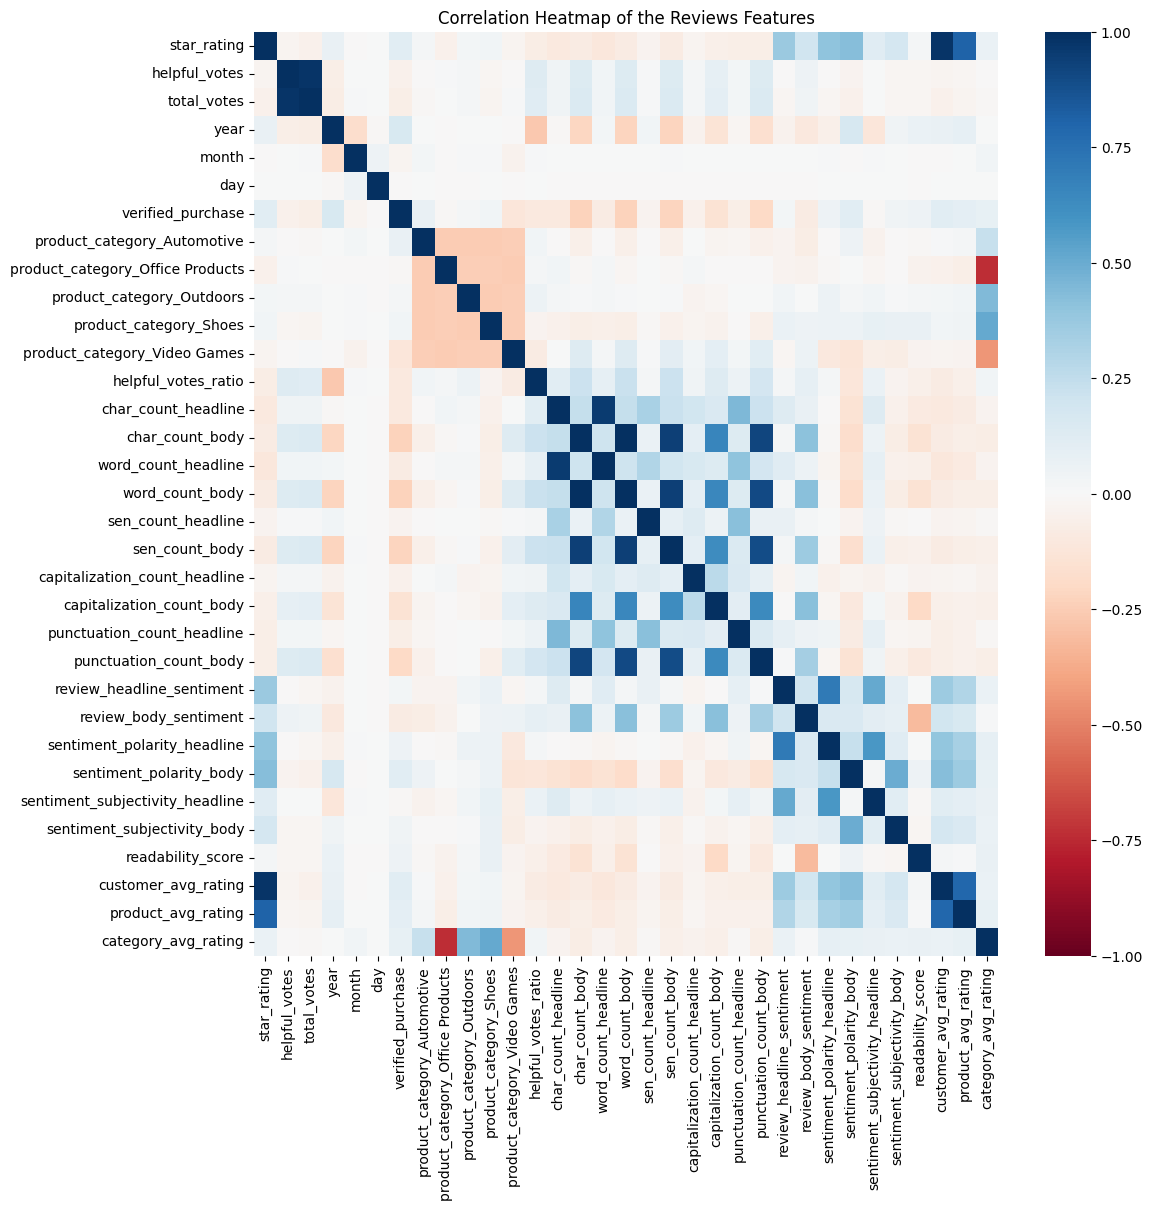

In [ ]:
# Display Heatmap of the Features
corr_mat = features_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_mat,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            center=0)
plt.title('Correlation Heatmap of the Reviews Features')
plt.show()

In [ ]:
'''
Ideally, each feature is independent and there is little multicollinearity.
From looking at the heatmap, it seems like most of the features are independent outside of a few columns.

Columns with very high correlation:
1) helpful votes and total votes
    - Keep only one of these columns (helpful votes)
2) Review body: char count, word count and sentence count
    - We added all three features just to account for some reviews that might have inequal ratios of these
    - However, they are so similar that all three is not needed and would just be bloat
    - Just keep char count
    - NOTE: punctuation and capitalization count are also very correlated with character count.
      However, it is still an important feature because a lot of fake reviews might have too many capitalizations or punctuation
3) Sentiment, polarity and subjectivity
    - Unlike the other two groups, these correlation between each of these is not all that high
    - all three are still important features and thus should be kept
4) Star rating and average star rating columns
    - These seem correlated because so many reviews are 5 stars.
    - However, they will still be kept because they could provide valuable information if a review differs wildly from the average

NOTE: In many instances the headline and body columns have slight correlation,
but it is still important to keep both columns as the correlation is not too high
and differences in headline and body could be a good indication of a fake review

*** We can use PCA before modeling to further improve our features dataset
'''

In [47]:
columns_to_drop = [
  'total_votes',
  'word_count_headline',
  'word_count_body',
  'sen_count_headline',
  'sen_count_body'
]

features_df = features_df.drop(columns=columns_to_drop)

In [48]:
# Save features_df for future use
features_df.to_csv('features_df.csv',index=False)

# Section 4: Label fake reviews

In order to train a model to complete our task the data must first be labeled. This can be a tricky task because the original dataset is not labeled so we must label the data ourselves. However, the most accurate method to accomplishing this is to physically go through every single review and manually label it accordingly. Unfortunately this is not feasible since there are 300,000 reviews in our data. As a result we have to use more subtle approaches to label the data.

Three methods to label the data:

1) Use Heuristic Rules for Weak Supervision

2) Use Unsupervised Clustering

3) Use Anomaly Detection

In [56]:
def display_labels(df, method):
  print(df[method].value_counts())
  print()
  print()

  print('5 Reviews which are labelled real: ')
  filtered_df = df[df[method] == 1]
  random_indices = np.random.choice(filtered_df.index, size=5, replace=False)
  for i in random_indices:
    print((df['review_headline'][i], df['review_body'][i], df['star_rating'][i], df['helpful_votes'][i]))
    print()

  print()
  print()

  print('5 Reviews which are labelled fake: ')
  filtered_df = df[df[method] == 0]
  random_indices = np.random.choice(filtered_df.index, size=5, replace=False)
  for i in random_indices:
    print((df['review_headline'][i], df['review_body'][i], df['star_rating'][i], df['helpful_votes'][i]))
    print()

## Section 4.1: First Method: Using Heuristic Rules

In this method we will create a set of rules that will determine whether or not a review is fake. This allows us to manually create rules initially but then use computing power to apply those rules to each review.

This is the simpliest method and requires the least compuation. However, it is not without its limits. Some limitations to this method are that the initial set of rules might not be comprehensive enough. There could be some outlier cases which the rules might not account for. Additionally, labeling reviews are context dependent meaning that some rules might not apply to a specific review for whatever reason.

In [ ]:
def label_with_heuristics(df):
  # This method will apply a set of rules to a row and return a label
  def heuristic_rules(row):
    # Rule 1: Labeled every verified purchase as real
    # We assume that if amazon has verified the purchase then the review must be real
    if row['verified_purchase'] == 1:
      return 1

    # Rule 2: Label the review as fake if it's helpfulness ratio is too low
    if row['total_votes'] > 5 and row['helpful_votes_ratio'] < 0.2:
      return 0

    # Rule 3: Label the review fake if the review is very short and has a lot of votes
    if row['word_count_body'] < 5 and row['total_votes'] > 30:
      return 0

    # Rule 4: Label the review fake if its star rating does not reflect the review's sentiment
    if row['star_rating'] == 1 and row['review_body_sentiment'] >= -10:
      return 0
    elif row['star_rating'] == 2 and row['review_body_sentiment'] >= -3.5 and row['review_body_sentiment'] <= -10:
      return 0
    elif row['star_rating'] == 3 and row['review_body_sentiment'] >= 3.5 and row['review_body_sentiment'] <= -3.5:
      return 0
    elif row['star_rating'] == 4 and row['review_body_sentiment'] >= 10 and row['review_body_sentiment'] <= 3.5:
      return 0
    elif row['star_rating'] == 5 and row['review_body_sentiment'] <= 10:
      return 0

    # Rule 5: Label the review fake if the readability score is too low
    if row['readability_score'] < 40:
      return 0

    # Rule 6: Label the review fake if the review headline does not match with the review body
    if row['review_headline_sentiment'] * row['review_body_sentiment'] < 0 and abs(row['review_headline_sentiment'] - row['review_body_sentiment']) > 5:
      return 0

    # Rule 7: Label the review fake if there are too many capitalized characters
    if row['capitalization_count_body'] / row['char_count_body'] > 0.1:
      return 0

    # Rule 8: Label the review fake if there are too many punctuation characters
    if row['punctuation_count_body'] / row['char_count_body'] > 0.1:
      return 0

    # If none of the other rules apply then assume the review is real
    return 1

  df['heuristic'] = df.apply(
    lambda x: heuristic_rules(x),
    axis=1
  )

  return df

In [ ]:
combined_df = label_with_heuristics(combined_df)
display_labels(combined_df, 'heuristic')

heuristic
1    275645
0     24355
Name: count, dtype: int64


5 Reviews which are labelled real: 
('Great product!', 'I use this polish to clean my silver. It does a great job cleaning and keeps my silver clean for a long time.  Great price also!', 5, 0)

('Saris Bones 2 Review', "Excellent rack. If you don't have to transport 3 bikes, you should get the Saris 2, it's significantly smaller.  Would have given it 5 stars, but Saris needs to figure out a way to not pull your straps through the middle part on initial set-up. They are not easy to get back in without something to long to push them through.", 4, 1)

('Perfect', 'Fits just right, looks good, good price, shipped fast! Thanks!', 5, 0)

('Nice game for kids', 'To be honest I bought this game for the easy achievements, but it was too boring for me. My daughter like it though.', 3, 0)

("I love these can's", 'Great product. Really easy to install yourself. They sound great. I put them on my Honda 919. They come with the removable i

In [ ]:
'''
Unfortunately this heuristic does not seem comprehensive enough to accurately differentiate between fake reviews.
Both labels appear to be equally real. This is somewhat expected since the method is not that complex.
This means that we should look for better methods to categorize the data.
'''

## Section 4.2: Second Method: Use Unsupervised Clustering

This method will use KMeans Clustering to try to cluster the data to two groups: real and fake reviews

Some limitations to this method are that the clusters might not inherently separate a review based on whether it is real or fake. This would become a bigger issue if the two clusters are not very different or have much separation.
Without initial cluster data, we will test a few different clustering methods such as kmeans and kmeans++

In [ ]:
#k-means++ clustering function
def kmeans_plus_clusterting(features_df, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5, random_state=42)
  kmeans.fit(features_df)
  new_centers = kmeans.cluster_centers_
  labels = kmeans.labels_
  return kmeans

#kmeans clustering function
def kmeans_clusterting(features_df, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, n_init=5, random_state=42)
  kmeans.fit(features_df)
  new_centers = kmeans.cluster_centers_
  labels = kmeans.labels_
  return kmeans

Below, we create some functions to help us find the optimal number of clusters using the elbow method.

In [ ]:
def elbow_method_kmeans(features_df, k_values):
  for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans.fit(features_df)
    WCSS.append(kmeans.inertia_)

  plt.figure(figsize=(10, 8))
  plt.plot(k_values, WCSS, marker='o')
  plt.title('Elbow Method for Optimal k', fontsize=12)
  plt.xlabel('Number of Clusters (k)', fontsize=12)
  plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
  plt.xticks(k_values)
  plt.grid()
  plt.show()

def elbow_method_kmeans_plus(features_df, k_values):
  for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=0)
    kmeans.fit(features_df)
    WCSS.append(kmeans.inertia_)

  plt.figure(figsize=(10, 8))
  plt.plot(k_values, WCSS, marker='o')
  plt.title('Elbow Method for Optimal k', fontsize=12)
  plt.xlabel('Number of Clusters (k)', fontsize=12)
  plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
  plt.xticks(k_values)
  plt.grid()
  plt.show()

Let us first try and cluster on TF-IDF data



In [ ]:
#read in combined_df file
combined_df = pd.read_csv('combined_df.csv')
combined_df.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US     51086982  R1OJLGJWROT0Y4  B002XJQVM2       219579233   
1          US     51148531  R3F1OFZ57MLTPZ  B0007DHU0S       411582542   
2          US     48710875   RXCSVF3NNCH8L  B002KGV3C6       573381303   
3          US     36506657  R1L4S60NHP1M5V  B001167XXY       267973018   
4          US     24139977  R2MDQM6YOGPEZE  B001P80EOI       834146694   

                                       product_title product_category  \
0  Averyamp;reg; Easy Peel Address Labels for Las...  Office Products   
1  Learning Resources Time Tracker Visual Timer &...  Office Products   
2  Sony PCM-M10 Portable Linear PCM Voice Recorde...  Office Products   
3  Genuine Brother TN-360 High Yield Black Toner ...  Office Products   
4  Panasonic Dect 6.0 Dark Grey Cordless Phone wi...  Office Products   

   star_rating  helpful_votes  total_votes  vine  verified_purchase  \
0            5              0            0     0                  0   
1            4              2            2     0                  1   
2            4             10           10     0                  1   
3            5              0            0     0                  1   
4            4             13           13     0                  1   

                                     review_headline  \
0                Free Software Makes the Labels Work   
1               not fun to set up, but works wonders   
2    Amazingly high quality for price & compact size   
3  Brother printers seem to like their own produc...   
4                                  Great basic phone   

                                         review_body review_date  year  month  \
0  Our town's energy committee recently had a pro...  2010-08-02  2010      8   
1  We use this to keep our four-year-old on task ...  2010-04-13  2010      4   
2  As purchase very good - it was shipped in incr...  2010-10-09  2010     10   
3  Works fine - as I expected.  Haven't had it lo...  2010-05-03  2010      5   
4  If you're looking for a basic phone that's eas...  2010-02-07  2010      2   

   day day_of_week  
0    2      Monday  
1   13     Tuesday  
2    9    Saturday  
3    3      Monday  
4    7      Sunday

In [ ]:
def preprocess(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Remove punctuation and non-English words
    words = [word for word in words if word.isalpha()]  # Keep only alphabetic words
    # Remove stopwords
    words = [word for word in words if word not in english_words]
    return " ".join(words)

In [ ]:
kmeans_df = combined_df['review_body'].head(10000)
english_words = set(words.words())
vectorizer = TfidfVectorizer()
tf_idf_review = [preprocess(review) for review in kmeans_df]
tfidf_matrix = vectorizer.fit_transform(tf_idf_review)
feature_names = vectorizer.get_feature_names_out()
dense_matrix = tfidf_matrix.toarray()
df_tfidf = pd.DataFrame(dense_matrix, columns=feature_names)

In [ ]:
print(df_tfidf)

      aaa  aaaa  aaaaakkkkkkk  aaaaarrrrrggggghhhhh  aaas  aacute  aaron  \
0     0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
1     0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
2     0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
3     0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
4     0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
...   ...   ...           ...                   ...   ...     ...    ...   
9995  0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
9996  0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
9997  0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
9998  0.0   0.0           0.0                   0.0   0.0     0.0    0.0   
9999  0.0   0.0           0.0                   0.0   0.0     0.0    0.0   

      aarp  aas  aaxa  ...  zips  zire  zires  zones  zooming  zoomtown  zune  \
0     

We now have tf-df data for our 10,000 rows. So what is tf-idf? It stands for term frequency inverse document frequency. It measures the frequency of a word in a 'document' or in this case for us in a review. If the word is used often throughout every review, such as 'the', the word gets a lower score indicating a lower impact. If the word is used frequently in the review, but not frequently in every review, this would boost the score given signifying the word holds importance. This could be a very insightful metric for us to use. We expect fake reviews whether written by people or AI to have a similar word pattern. If kmeans is able to find that pattern, we would expect a cluster of 'fake reviews' that we can potentially identify. We will first try the elbow method to see what the optimal number of clusters may be

We can also use the elbow method to try and predict what the best number of clusters is

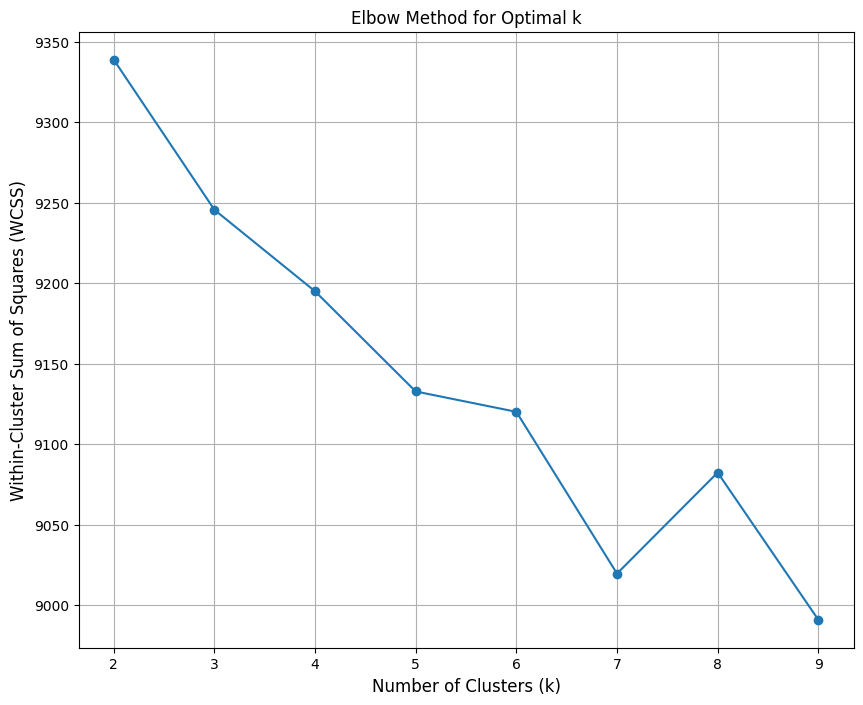

In [ ]:
WCSS = []
elbow_method_kmeans(df_tfidf, range(2, 10))
WCSS = []
elbow_method_kmeans_plus(df_tfidf, range(2, 10))

Luckily, my elbow does not look like this. On a local machine, we ran more clusters and the elbow was still not well defined. We do not need to run standard scaler on tf-idf data since the data is already normalized from 0 to 1. We can consider running PCA on the data to see if reducing the number of components helps with clustering. We can first check to see how many components we should use with.

In [ ]:
def graph_pca(df, n_components):
  pca = PCA(n_components=n_components)
  x_train = pca.fit_transform(df)
  explained_variance_ratios = pca.explained_variance_ratio_
  cum_evr = np.cumsum(explained_variance_ratios)
  num_components = np.arange(1, len(cum_evr) + 1)
  plt.figure(figsize=(10, 8))
  plt.plot(num_components, cum_evr, marker='o', linestyle='-', color='g', label='Cumulative Explained Variance')
  plt.axhline(y=0.80, color='c', linestyle='-', label='80% Variance Threshold')
  plt.title('Cumulative Explained Variance vs. Number of Components')
  plt.xlabel('Number of Principal Components')
  plt.ylabel('Cumulative Explained Variance Ratio')
  plt.xticks()
  plt.grid()
  plt.legend()
  plt.show()
  return x_train

In [ ]:
#%%
graph_pca(df_tfidf, 2400)

Based on the data above, we are going for a PCA of about 2400 to explain 90% of the variance

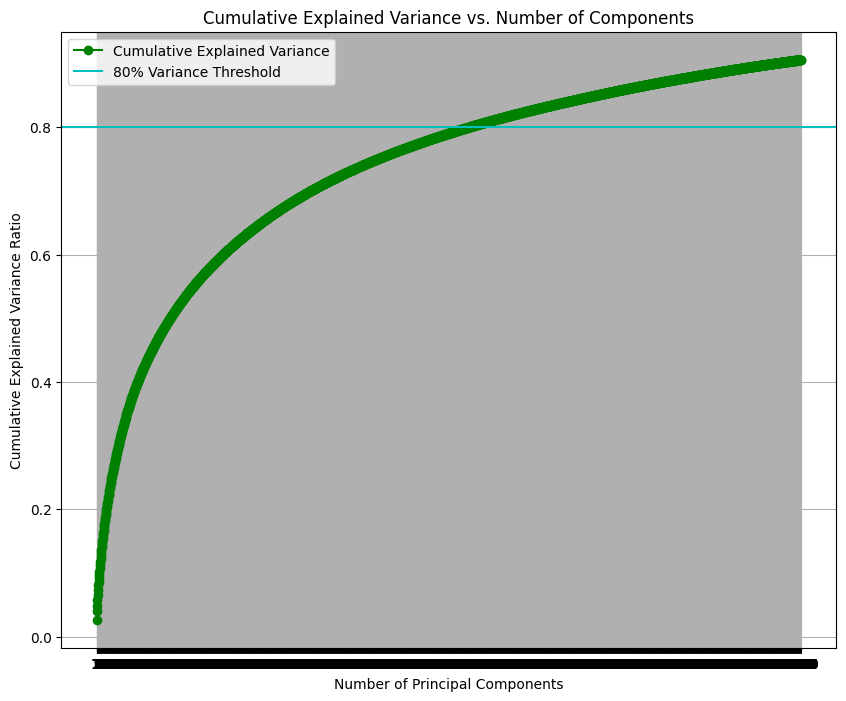

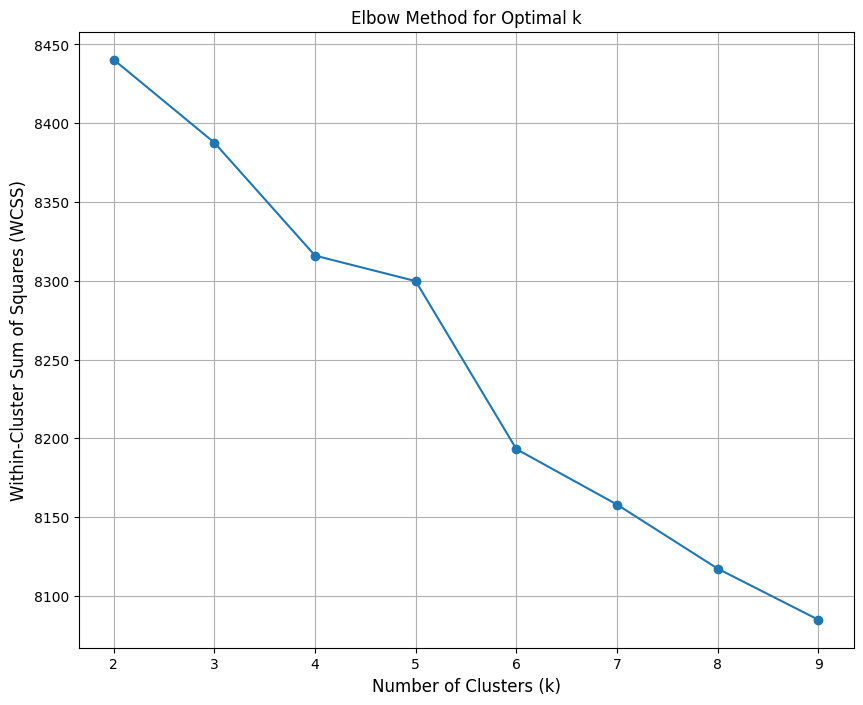

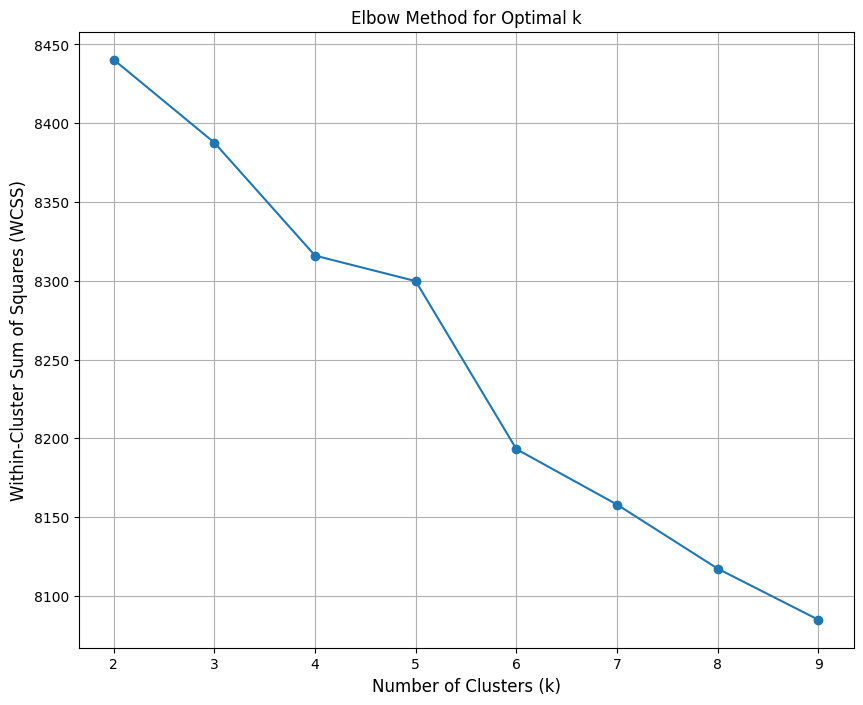

In [ ]:
x_train = graph_pca(df_tfidf, 2400)

WCSS = []
elbow_method_kmeans(x_train, range(2, 10))
WCSS = []
elbow_method_kmeans_plus(x_train, range(2, 10))

Based on the above, the elbow still isn't defined but the graph does look better. We will use 6 clusters for our clustering technique. We can also see the WCSS scores are about the same for kmeans and kmeans++. We will use kmeans++ for our final cluster.

In [ ]:
kmeans = kmeans_plus_clusterting(x_train, 6)
labels = kmeans.labels_

In [ ]:
tfidf_labels = pd.DataFrame({
    'Review': tf_idf_review,      # Original documents
    'Cluster Label': labels     # KMeans cluster labels
})
print(tfidf_labels)
tfidf_labels['Cluster Label'].value_counts()

                                                 Review  Cluster Label
0     needed labels cfl bulbs bulbs cfl bulbs bulbs ...              2
1     having meals hours focused br br countdown rev...              1
2     owned online reviews folks compared pcm excels...              4
3                                        expected lasts              4
4                        answering has spaces purchased              3
...                                                 ...            ...
9995                                                oem              4
9996                              pleased wanted wanted              4
9997                                            cheaper              4
9998  constructed gives needed rails brackets bearin...              4
9999                        markers textbooks textbooks              4

[10000 rows x 2 columns]


In [ ]:
tfidf_labels['Cluster Label'].value_counts()

Cluster Label
4    7033
3     883
1     722
2     612
0     469
5     281
Name: count, dtype: int64

Now lets take a look at the verified prchase column. We can expect a verified purchase to most likely not be a fake review so we can compare each cluster to see if a certain cluster has a larger number of non-verified purchases.

In [ ]:
tfidf_labels['Verified_Purchase'] = combined_df['verified_purchase'].head(10000)
print()

                                                 Review  Cluster Label  \
0     needed labels cfl bulbs bulbs cfl bulbs bulbs ...              2   
1     having meals hours focused br br countdown rev...              1   
2     owned online reviews folks compared pcm excels...              4   
3                                        expected lasts              4   
4                        answering has spaces purchased              3   
...                                                 ...            ...   
9995                                                oem              4   
9996                              pleased wanted wanted              4   
9997                                            cheaper              4   
9998  constructed gives needed rails brackets bearin...              4   
9999                        markers textbooks textbooks              4   

      Verified_Purchase  
0                     0  
1                     1  
2                     1  
3      

In [ ]:
verified_percentage = tfidf_labels.groupby('Cluster Label')['Verified_Purchase'].mean() * 100
print(verified_percentage)

Cluster Label
0    76.545842
1    55.817175
2    67.156863
3    72.027180
4    76.951514
5    85.053381
Name: Verified_Purchase, dtype: float64


Based on the data, we can see cluster 1 only has a 55% verification. This could be very interesting and we could explore this cluster more.

Next, we will perform clustering on BERT embeddings. The idea here is, BERT embeddings creates context scores for each word in the sentence. If AI or a certain person is writing large number of fake reviews, we should see a similar embedding pattern between the reviews. We will now perform clustering on the embeddings to determine whether this is detectable

In [ ]:
# read in BERT data that was generated below in the BERT section
combined_bert = pd.read_csv('bert_df.csv')
combined_bert.head()

Unnamed: 0                                        review_body
0           0  [-5.98957166e-02 -5.36829606e-03  2.11894572e-...
1           1  [-8.67343470e-02  1.01023898e-01  2.13900790e-...
2           2  [-1.23636156e-01  2.17080209e-02  3.41668010e-...
3           3  [-1.31412148e-02 -2.09351972e-01  3.03145349e-...
4           4  [-1.19237155e-01 -5.54917753e-03  2.65551031e-...

unlike tf_idf, we need to first scale our data, we also need to preprocess our data since it was imported in.

In [ ]:
embeddings = combined_bert['review_body']
embeddings = embeddings.apply(lambda x: x[1:])
embeddings2 = embeddings.str.split()
print(embeddings2)

0       [-5.98957166e-02, -5.36829606e-03, 2.11894572e...
1       [-8.67343470e-02, 1.01023898e-01, 2.13900790e-...
2       [-1.23636156e-01, 2.17080209e-02, 3.41668010e-...
3       [-1.31412148e-02, -2.09351972e-01, 3.03145349e...
4       [-1.19237155e-01, -5.54917753e-03, 2.65551031e...
                              ...                        
9995    [-1.94302961e-01, 6.55634329e-02, 3.38286608e-...
9996    [6.54181764e-02, 2.08992615e-01, 9.75738242e-0...
9997    [-7.88816065e-02, -1.15056105e-01, 3.26235294e...
9998    [-1.83690608e-01, 1.54287800e-01, 1.37396067e-...
9999    [6.88722804e-02, 1.41254693e-01, 3.68402973e-0...
Name: review_body, Length: 10000, dtype: object


In [ ]:
for inner_list in embeddings2:
    inner_list[-1] = inner_list[-1][:-1]
print(embeddings2)
for inner_list in embeddings2:
    inner_list[:] = [float(x) for x in inner_list]
print(embeddings2)

0       [-5.98957166e-02, -5.36829606e-03, 2.11894572e...
1       [-8.67343470e-02, 1.01023898e-01, 2.13900790e-...
2       [-1.23636156e-01, 2.17080209e-02, 3.41668010e-...
3       [-1.31412148e-02, -2.09351972e-01, 3.03145349e...
4       [-1.19237155e-01, -5.54917753e-03, 2.65551031e...
                              ...                        
9995    [-1.94302961e-01, 6.55634329e-02, 3.38286608e-...
9996    [6.54181764e-02, 2.08992615e-01, 9.75738242e-0...
9997    [-7.88816065e-02, -1.15056105e-01, 3.26235294e...
9998    [-1.83690608e-01, 1.54287800e-01, 1.37396067e-...
9999    [6.88722804e-02, 1.41254693e-01, 3.68402973e-0...
Name: review_body, Length: 10000, dtype: object
0       [-0.0598957166, -0.00536829606, 0.211894572, 0...
1       [-0.086734347, 0.101023898, 0.21390079, 0.1216...
2       [-0.123636156, 0.0217080209, 0.34166801, 0.118...
3       [-0.0131412148, -0.209351972, 0.303145349, 0.2...
4       [-0.119237155, -0.00554917753, 0.265551031, 0....
                        

In [ ]:
kmeans_bert = np.array(embeddings2.tolist())

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(kmeans_bert)
print(X_train_scaled)

[[-0.17036284 -0.3799152  -0.48291985 ...  0.26358392 -0.11726037
   1.31993002]
 [-0.37990445  0.63428387 -0.46421027 ...  0.28327737  0.01479931
   1.01453925]
 [-0.66801396 -0.12180627  0.72732084 ...  0.51099273 -0.11652151
  -1.79726717]
 ...
 [-0.31859447 -1.4255302   0.58339846 ...  0.6530922   0.22020612
  -0.44881112]
 [-1.13688686  1.14202977 -1.17767776 ...  0.5757231  -1.81154974
   0.20644903]
 [ 0.83498852  1.01778978 -2.11544041 ... -0.15631512 -0.27086477
   0.86230684]]


Let us run the PCA test again to see if we can reduce the number of dimensions

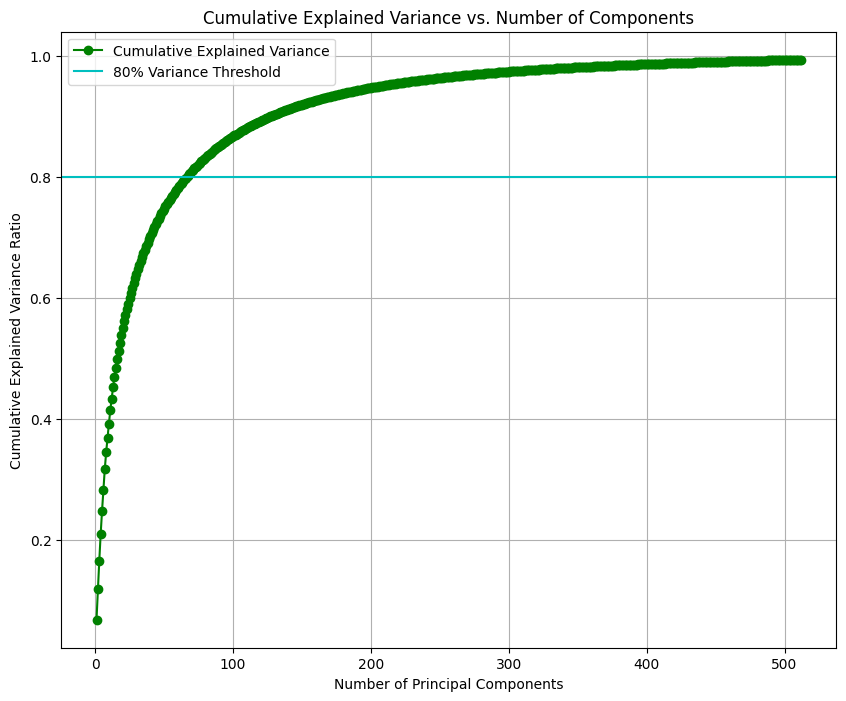

array([[ 1.17578636e+01, -5.54071607e+00,  2.77403331e+00, ...,
        -2.22764514e-02, -1.45636543e-01,  3.58801404e-02],
       [ 1.30224570e+01, -3.38607915e+00, -3.63807475e+00, ...,
         1.11024243e-01,  4.18500748e-03,  3.07387716e-01],
       [ 2.98915155e+00,  5.12691815e+00,  2.45609118e-02, ...,
        -1.08085188e-01,  8.08805474e-02, -1.44149168e-01],
       ...,
       [-1.04286190e+01,  1.51676597e+01, -4.28272696e+00, ...,
        -2.30160925e-01, -1.19266455e-01,  1.33462431e-01],
       [-1.21180461e-01,  1.08307522e+00, -2.68501026e+00, ...,
        -2.58196259e-03,  1.26193602e-01, -2.69251137e-01],
       [-4.46096164e+00, -5.62633052e+00, -4.47589618e+00, ...,
         8.56107707e-02,  7.22193518e-02,  9.23779993e-02]])

In [ ]:
graph_pca(X_train_scaled, 512)

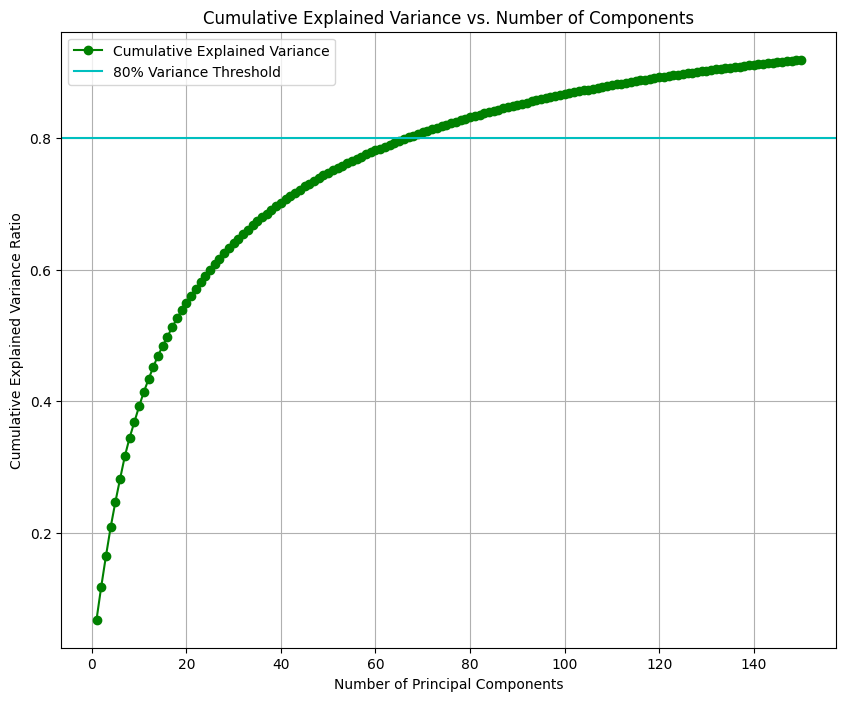

In [ ]:
x_train_bert = graph_pca(X_train_scaled, 150)

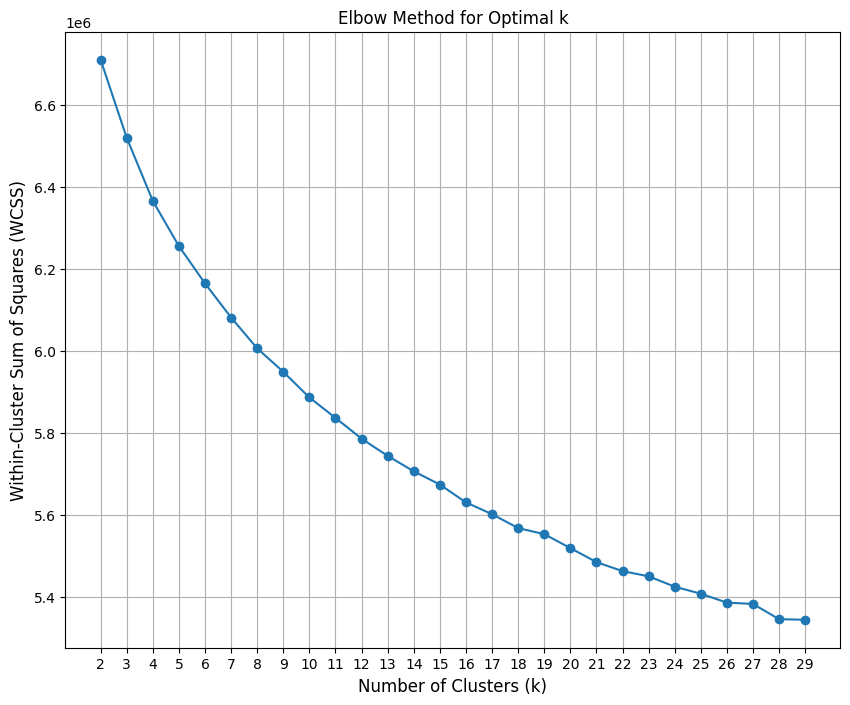

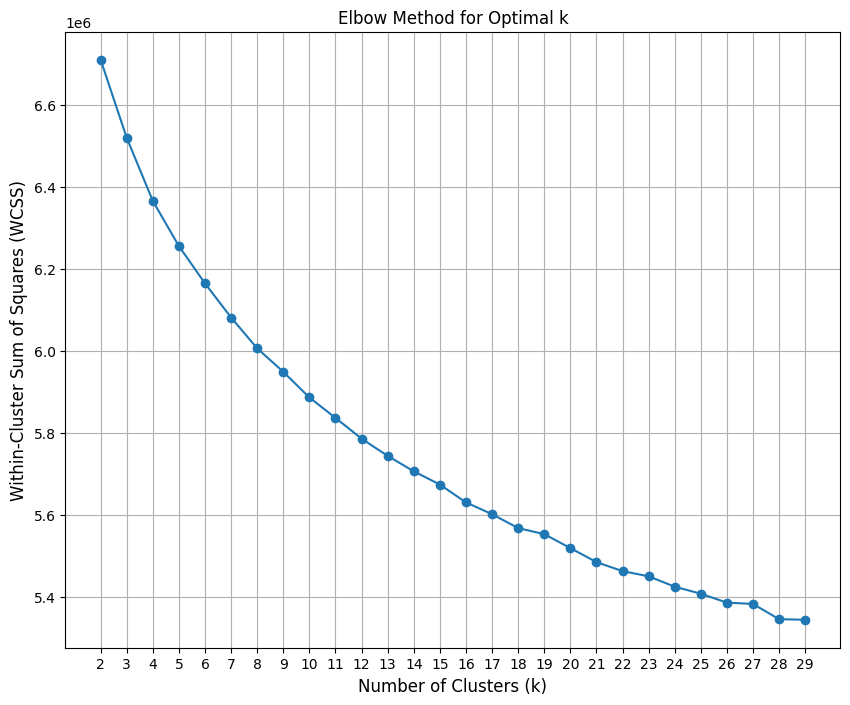

In [ ]:
WCSS = []
elbow_method_kmeans(x_train_bert, range(2, 20))
WCSS = []
elbow_method_kmeans_plus(x_train_bert, range(2, 20))

The elbow for BERT embeddings is much better defined. While it appears a cluster number such as 18 may be better, we are going to use 6 clusters to see if it matches how we clustered tf-idf values

In [ ]:
kmeans_bert = kmeans_plus_clusterting(x_train_bert, 6)

In [ ]:
labels_bert = kmeans_bert.labels_
bert_labels = pd.DataFrame({
    'Review': tf_idf_review,      # Original documents
    'Cluster Label_Bert': labels_bert     # KMeans cluster labels
})
print(bert_labels)
bert_labels['Cluster Label_Bert'].value_counts()

                                                 Review  Cluster Label_Bert
0     needed labels cfl bulbs bulbs cfl bulbs bulbs ...                   1
1     having meals hours focused br br countdown rev...                   1
2     owned online reviews folks compared pcm excels...                   0
3                                        expected lasts                   5
4                        answering has spaces purchased                   0
...                                                 ...                 ...
9995                                                oem                   5
9996                              pleased wanted wanted                   2
9997                                            cheaper                   5
9998  constructed gives needed rails brackets bearin...                   4
9999                        markers textbooks textbooks                   4

[10000 rows x 2 columns]


Cluster Label_Bert
1    2161
4    1907
3    1713
0    1709
2    1296
5    1214
Name: count, dtype: int64

In [ ]:
df_combined = pd.concat([tfidf_labels, bert_labels], axis=1)
print(df_combined)

                                                 Review  Cluster Label  \
0     needed labels cfl bulbs bulbs cfl bulbs bulbs ...              2   
1     having meals hours focused br br countdown rev...              1   
2     owned online reviews folks compared pcm excels...              4   
3                                        expected lasts              4   
4                        answering has spaces purchased              3   
...                                                 ...            ...   
9995                                                oem              4   
9996                              pleased wanted wanted              4   
9997                                            cheaper              4   
9998  constructed gives needed rails brackets bearin...              4   
9999                        markers textbooks textbooks              4   

      Verified_Purchase                                             Review  \
0                     0  needed l

In [ ]:
verified_percentage_bert = df_combined.groupby('Cluster Label_Bert')['Verified_Purchase'].mean() * 100
print(verified_percentage_bert)

Cluster Label_Bert
0    79.286132
1    55.020824
2    83.410494
3    77.933450
4    74.724698
5    88.550247
Name: Verified_Purchase, dtype: float64


We can see, cluster 1 is also at 55% for verified purchases. Lets take data that are in cluster 1 for both tf-idf and BERT. If we had more time, we could potentially use this data to compare to a pre-trained model of fake data to see if it could detect that the data is fake

In [ ]:
final_kmeans = df_combined[(df_combined['Cluster Label'] == 1) & (df_combined['Cluster Label_Bert'] == 1)]

## Section 4.3: Third Method: Use Anomaly Detection

This method will use Isolation Forest to detect anomalies in the data. This method might be more useful, if the amount of fake reviews are very small (so as to be an anomaly). This is because Isolation Forest helps identify outliers in the data. This could be pretty helpful because fake reviews will most likely reviews with outliers in a lot of aspects.

Some limitations to this method are that outliers in the data may not always be a fake review. For example, there could be a really positive review that is essentially an anomaly but its still a real review. Additionally, if there are many fake reviews then outliers will not be the only fake reviews and this method might miss many fake reviews that are not outliers.

In [ ]:
combined_df = pd.read_csv('combined_df.csv')
features_df = pd.read_csv('features_df.csv')

In [49]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   star_rating                       300000 non-null  int64  
 1   helpful_votes                     300000 non-null  int64  
 2   year                              300000 non-null  int64  
 3   month                             300000 non-null  int64  
 4   day                               300000 non-null  int64  
 5   verified_purchase                 300000 non-null  int64  
 6   product_category_Automotive       300000 non-null  int64  
 7   product_category_Office Products  300000 non-null  int64  
 8   product_category_Outdoors         300000 non-null  int64  
 9   product_category_Shoes            300000 non-null  int64  
 10  product_category_Video Games      300000 non-null  int64  
 11  helpful_votes_ratio               300000 non-null  f

In [59]:
features_anamoly_df = features_df[['star_rating', 'helpful_votes', 'verified_purchase', 'review_body_sentiment', 'sentiment_polarity_body', 'readability_score']]

In [64]:
# from sklearn.ensamble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

# Step 1: Convert 'review_body' to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = vectorizer.fit_transform(combined_df['review_body'])

# Step 2: Scale numeric features (e.g., star_rating, helpful_votes)
scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(features_df)

# Step 3: Combine text features (TF-IDF) and numeric features
X_combined = hstack([X_text, X_numeric])

In [60]:
# from sklearn.ensamble import IsolationForest
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack

# Step 1: Convert 'review_body' to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = vectorizer.fit_transform(combined_df['review_body'])

# Step 2: Scale numeric features (e.g., star_rating, helpful_votes)
scaler = MinMaxScaler()
X_numeric = scaler.fit_transform(features_anamoly_df)

# Step 3: Combine text features (TF-IDF) and numeric features
X_combined = hstack([X_text, X_numeric])

In [65]:
# Step 4: Apply Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
model.fit(X_combined)

IsolationForest(contamination=0.05, n_jobs=-1, random_state=42)

In [61]:
# Step 4: Apply Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
model.fit(X_combined)

IsolationForest(contamination=0.05, n_jobs=-1, random_state=42)

In [66]:
# Predict anomalies
combined_df['anomaly'] = model.predict(X_combined)
# Label anomalies
combined_df['anomaly'] = combined_df['anomaly'].apply(lambda x: 0 if x == -1 else x)

In [67]:
display_labels(combined_df, 'anomaly')

anomaly
1    285000
0     15000
Name: count, dtype: int64


5 Reviews which are labelled real: 
('Great product', 'Got these after reading the mostly positive reviews. I had seen other sets with really poor ratings. I went with these and am not disappointed at all. Easy install, and they work great!  Super bright. Nice quality pieces.', 5, 0)

('Fits perfectly with smith maze helmet', 'Fits perfectly with my smith maze helmet.  All the wires can be hidden into the soft/zippered ear covers when not in use.  Sound is clear and works fine.', 5, 0)

('As described', 'Great game for kids. Lightening fast shipping', 4, 0)

('Great Product!', 'I am very satisfied with this purchase. It is exactly what my husband wanted. I purchased it for him for Christmas. Super fast shipping! Only complain I have is that the case was broken. Not the packaging but the case. Other than that perfect!', 5, 1)

('Nice and white, good quality', 'I make greeting cards.  With the time I spend on each one, I want a 

In [ ]:
'''
Just like the heuristic labels, it is still very hard to differentiate both categories.
Both labelled reviews seem real. This means that anomaly detection is probably not the best technique for labelling our data.
'''

### Comments about labelling with unsupervised learning

It seems that all three of the methods were not successful in differentiating whether a review is fake or not. There could have been many factors to this:

1. We needed more varied data. It could have been that our dataset (or even our specific sample) could have not had that many fake reviews to begin with. Additionally, our dataset should contain more reviews that are "obviously" fake so the model can really learn and differentiate an "obviously" fake review from normal reviews.

2. There might have been a lack of domain specific features. We generated sentiment scores and readability scores for the reviews, which are good features for detecting fake reviews. However, there are many other features that are important for detecting fake reviews that were just not possible to use given our dataset. For example, research on fake reviews show that one of the best ways to detect fake reviews is to look at a reviewer's history and if they have been spamming reviews in a short time then it is a red flag. However, this would require specific timestamp of the review, which the dataset does not provide. Additionally, getting a reviewer's history in general is tough to do in our dataset since majority of the customers only have 1 review meaning they do not have a history.

3. There are limitations to unsupervised models. Since the unsupervised model do not have labels in their training data, they can only group the data and try to find patterns. However, if there is a lot overlap between real and fake reviews, then the unsupervised models will have a hard time clustering each group accurately.

4. "True" fake reviews are much more subtle had much harder to detect. When we think of fake reviews our first thought is the obvious fake reviews which are pretty easy to detect. For example, if a reviews rates a product 5 stars and writes "this product is garbage". This is obviously fake, but most reviews are not like this and in fact this is very rare. In reality, fake reviews often mimic real reviews, so the average person would not be able to detect it as fake on its own based on the text. This means that labelling fake reviews often require expert analysis.


## Section 4.4: Explore to use Pretrained LLM for labelling on fake reviews

Since we were not able to notice differences on fake and real reviews, we thought using a pretrained LLM would help label our data for us. As a result, we decided to use BERT to try label our reviews.

In [ ]:
# Download and query the bert-base-cased model
bert_model = pipeline('fill-mask', model='bert-base-cased', device=device_id)
print(bert_model("I went to an [MASK] restaurant and ordered pasta."))

def predict_mask_with_bert(df, text_column, row_index, model_name='bert-base-cased', device=-1):
    """
    Generate predictions for a masked token in a text using a BERT model.

    Parameters:
    - df: pd.DataFrame, the input dataframe containing text data.
    - text_column: str, the column name in the dataframe that contains the text.
    - row_index: int, the index of the row to process.
    - model_name: str, the name of the BERT model to use (default: 'bert-base-cased').
    - device: int, the device to run the model on (-1 for CPU, device ID for GPU).

    Returns:
    - List of tuples containing predicted token and its score.
    """
    # Initialize the BERT fill-mask pipeline
    bert_model = pipeline('fill-mask', model=model_name, device=device)

    # Get the text from the specified row and column
    text_prompt = " This is a fake review, Yes or No? The answer is [MASK]."
    text = df.iloc[row_index][text_column][:256] + text_prompt  # Limit to 256 characters for compatibility

    # Make predictions using the BERT model
    predictions = bert_model(text)

    # Format the predictions as a list of tuples
    results = [(prediction['token_str'], prediction['score'], prediction['sequence']) for prediction in predictions]

    return results

In [ ]:
### This is an example
predictions = predict_mask_with_bert(combined_df, 'review_body', 1)
for token, score, sequence in predictions:
    print(f"{token} has a score {score} in {sequence}")

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


no has a score 0.3140270411968231 in We use this to keep our four - year - old on task when eating. After having her draw out meals for hours, we thought maybe a visual timer might help her stay focused on the task at hand. < br / > < br / > The timer comes with a 30 - minute program set into its memory, This is a fake review, Yes or No? The answer is no.
yes has a score 0.2754492163658142 in We use this to keep our four - year - old on task when eating. After having her draw out meals for hours, we thought maybe a visual timer might help her stay focused on the task at hand. < br / > < br / > The timer comes with a 30 - minute program set into its memory, This is a fake review, Yes or No? The answer is yes.
simple has a score 0.08387373387813568 in We use this to keep our four - year - old on task when eating. After having her draw out meals for hours, we thought maybe a visual timer might help her stay focused on the task at hand. < br / > < br / > The timer comes with a 30 - minute 

In [ ]:
### Build a function which returns the most likely word for labelling purpose
def predict_mask_with_bert_from_text(text):
    """
    Generate predictions for a masked token in a text using a BERT model.

    Parameters:
    - text: str, the input text for prediction.
    - model_name: str, the name of the BERT model to use (default: 'bert-base-cased').
    - device: int, the device to run the model on (-1 for CPU, device ID for GPU).

    Returns:
    - List of tuples containing predicted token and its score.
    """
    # Append the masked prompt to the text (limit to 256 characters for compatibility)
    text_prompt = " This is a fake review, Yes or No? The answer is [MASK]."
    input_text = text[:256] + text_prompt

    # Make predictions using the BERT model
    #predictions = bert_model(input_text)

    # Format the predictions as a list of tuples
    #results = [(prediction['token_str'], prediction['score']) for prediction in predictions]
    # Return the predicted most likely token_str
    return bert_model(input_text)[0]['token_str']

In [ ]:
sample_text = "The product quality is amazing!"
predictions = predict_mask_with_bert_from_text(sample_text)
print(predictions)
# print(predictions[0]['token_str'])

no


In [ ]:
### This is a long process taking 1 hour +
# combined_df['review_body_label'] = ['review_body'].apply(predict_mask_with_bert_from_text)
def select_rows_by_year(df, year_column, n_rows, random_state=None):
    """
    Select a fixed number of rows for each unique year in a specified column.

    Parameters:
    - df: pd.DataFrame, the input DataFrame.
    - year_column: str, the name of the column containing year information.
    - n_rows: int, the number of rows to select for each year.
    - random_state: int or None, the random seed for reproducibility (default: None).

    Returns:
    - pd.DataFrame, a new DataFrame containing the selected rows.
    """
    if year_column not in df.columns:
        raise ValueError(f"Column '{year_column}' does not exist in the DataFrame.")

    if n_rows <= 0:
        raise ValueError("The number of rows to select must be greater than 0.")

    # Group by year and sample a fixed number of rows for each year
    selected_rows = (
        df.groupby(year_column, group_keys=False)
        .apply(lambda group: group.sample(n=min(n_rows, len(group)), random_state=random_state))
    )

    return selected_rows

In [ ]:
test_df = select_rows_by_year(combined_df, 'year', 500, random_state=42)
test_df

<ipython-input-33-a0d9c4e6b0a9>:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.sample(n=min(n_rows, len(group)), random_state=random_state))


marketplace  customer_id       review_id  product_id  product_parent  \
183553          US     20266637   RICSTLWIHMV0B  B003UAGGN2       521452252   
9427            US     52038877   R3FJ6D5X3DYWY  B003DU1RI8       513314912   
199             US     13893389  R15DIMXHEHHNMM  B002JPCLTM       612852383   
62447           US     51906104  R27OYA1Z8GQFJJ  B00434FED2       382204230   
189489          US     13599393   R6HDT4Y3BRASB  B0018CDLKA       193521310   
...            ...          ...             ...         ...             ...   
50314           US     15772880  R3LMFMECTX6VAS  B005V1RF6K       728249750   
111449          US     42758293   RLT8SHOUUUQNO  B005RKE4PK       528623982   
230745          US     11462614  R1DJD73ET73E4A  B00EVZOBX2        95610379   
179702          US     42610641  R3IPQCMEG3GV1B  B000KZ1Z40       987950233   
177658          US     22139566   RUVUQ4SK2OA5P  B0078YEEA8       130115916   

                                            product_title product_category  \
183553           Charles David Women's Tory Platform Boot            Shoes   
9427    Sony ICD-PX820D Digital Voice Recorder with Bu...  Office Products   
199     Classics: Ultimate Automobile 2010 Wall Calend...  Office Products   
62447                      Michael Jackson The Experience      Video Games   
189489          AK Anne Klein Women's Indie Peep Toe Pump            Shoes   
...                                                   ...              ...   
50314                        NPW-USA Predict A Pen, Black  Office Products   
111449                   Puzzler World 2012 (Nintendo DS)      Video Games   
230745  Western Chief Kids Unisex Solid Waterproof Rai...            Shoes   
179702  Keyless Entry Remote Fob Clicker for 2004 Mazda 6       Automotive   
177658               Puig 5650H Light Smoke Racing Screen       Automotive   

        star_rating  helpful_votes  total_votes  ...  verified_purchase  \
183553            4              1            1  ...                  0   
9427              5             17           17  ...                  1   
199               5              0            0  ...                  1   
62447             5              0            0  ...                  0   
189489            3              2            2  ...                  1   
...             ...            ...          ...  ...                ...   
50314             3              3            3  ...                  1   
111449            5              0            0  ...                  1   
230745            3              0            1  ...                  1   
179702            5              0            0  ...                  1   
177658            5              1            1  ...                  1   

                                    review_headline  \
183553                                    Good boot   
9427                         Does the job very well   
199                        Great Classic Car Photos   
62447                         My first 'dance' game   
189489                 Attractive but needs padding   
...                                             ...   
50314    Bought for a Joke, not to use all the time   
111449                                   Five Stars   
230745  I thought these boots seemed great at first   
179702                                   Five Stars   
177658           Perfect for the Ducati Monster 696   

                                              review_body review_date  year  \
183553  Comfortable boot runs true to size.  Nice heig...  2010-12-26  2010   
9427    I bought this little gem to record ideas and n...  2010-11-22  2010   
199     This calendar showcases 12 great classic autom...  2010-01-25  2010   
62447   Essentially, this is Guitar Hero with your bod...  2010-12-22  2010   
189489  This is a very attractive and classy looking s...  2010-08-04  2010   
...                                                   ...         ...   ...   
50314 

In [ ]:
### This step runs for 15 mins
test_df['review_body_label'] = test_df['review_body'].apply(predict_mask_with_bert_from_text)

In [ ]:
test_df['review_body_label'].value_counts()

review_body_label
no        2993
yes          6
simple       1
Name: count, dtype: int64

In [ ]:
no_df = test_df[test_df['review_body_label'] == 'no']
# yes_df
###
counter = 0
for index, row in no_df.iterrows():
    print(row['review_body'])
    counter += 1
    if counter == 10:
      break

Comfortable boot runs true to size.  Nice height because of the platform.  looks great and is very stylish runs true to size its a good boot to add to shoe collection
I bought this little gem to record ideas and notes while on the go.  It is designed specifically for this task and it does it very well.  Being designed by Sony never hurts either.  I have always admired Sony electronics.    Features I found useful:  1) Pause and resume recording  2) Listen to recordings at faster speed than recorded  3) I can attach an external mic with 3.5mm jack  4) Audio out 3.5 mm jack  5) Device lock  6) You can use it as a 2GB flash drive if you want or you can use some of it and leave the rest for audio recordings.  In other words, when attached to my computer via mini USB cable, it allows direct access to its memory area by showing up as a disk drive on my PC.    Annoyances:  1) If I forget to lock the device and it is in my pocket, any accidental touch or push starts playing back the last record

In [ ]:
yes_df = test_df[test_df['review_body_label'] == 'yes']
# yes_df
###
for index, row in yes_df.iterrows():
    print(row['review_body'])

I'm very happy with this product.  After viewing the instructions on utube, it was easy to close. I recommend people who buy this product to see the video first to see if they can manage it.  This is a great invention.  Cheers.
I absolutely LOVE these shoes.  They are great with my scrubs and look great with a pair of jeans. My heels love them too.  I will definitely being buying some more.
Cool, soft, made in Vietnam. Yes need one size less than real size. Color is darker than on photo. I am happy).
The game is amazing. The Far Cry series has been one of my all time favourites. The games look good, they let you explore, gave you endless choices of how to complete quests and had great weapons. I was really looking forward to Far Cry 3 because I know that if it was anything like the games before it, it would be amazing and I was right. The story is interesting, the gameplay is AMAZING, the world is huge, exploring is endless and the weapons are great. One of the things I really enjoy ab

*Comments:*

The labelled fake comments do look like real comments.

*   The process is too slow to run on all the data.
*   There are very few fake comments in general based on Bert model prediction.

Ultimately, using BERT is both not feasible nor effective in labelling our data.

## Section 4.5: Bert Encoding

Here we decided to do some analysis on Bert Encodings to see how effective of Bert labels would be

In [ ]:
combined_df = pd.read_csv('combined_df.csv')
combined_df.head()

In [ ]:
# Load pre-trained DistilBERT model and tokenizer we use distilbert in order to improve the speeds of tokenizing.
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Function to get BERT embeddings
def get_bert_embeddings(text):
    # Encode the text using BERT tokenizer, we set a max_length to 64 due to the size of the data used
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=64)

    # Get the output embeddings from BERT model
    with torch.no_grad():
        outputs = model(**inputs)
        last_hidden_state = outputs.last_hidden_state
    # The embeddings are in outputs.last_hidden_state, we average over all tokens for a fixed-length embedding
    sentence_embedding = torch.mean(last_hidden_state, dim=1).squeeze().cpu().numpy()
    return sentence_embedding

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Reduce data size to a manageable amount
combined_bert = combined_df[:10000]
combined_bert['bert_embeddings_body'] = combined_bert['review_body'].apply(get_bert_embeddings)

# Display the DataFrame with the embeddings
print(combined_bert[['review_body', 'bert_embeddings_body']].head())

Now let us train a model to see if we can return sentiment values for each review

The data above can be used for clustering analysis such as in section 4.2. For sentiment analysis, since we do not have labels to train on, we can use a pre-trained model from Hugging Face to retrieve sentiment analysis using BERT

In [ ]:
bert_sentiment = pipeline("sentiment-analysis", device=0)
bert_sentiment('Five Stars')

As you can see above, in nltk, we received a neutral 1 score for the terxt Five Stars, but in BERT, we receive a positive score of 1. The goal of the next section is to analyze the Hugging Face pretrained model and see whether it could properly predict star rating based on the sentiment given.

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis", device = 0)

data = combined_df['review_body'].tolist()
data = data[:10000]

results = sentiment_pipeline(data, truncation=True)

We now have 10000 rows of data with sentiment results. Lets zip together the results along with the star rating from the result. We can then run a linear regression model to see if there is a correlation between these two results.

In [ ]:
labels = list(map(lambda results: results['label'], results))
scores = list(map(lambda scores: scores['score'], results))

df_sentiment = zip(data, labels, scores, data2)
df_sentiment_list = list(df_sentiment)
df = pd.DataFrame(df_sentiment_list, columns=['Data', 'Pos_Neg', 'Score', 'Star_rating'])
df['Score'] = df.apply(lambda row: -row['Score'] if row['Pos_Neg'] == 'NEGATIVE' else row['Score'], axis=1)

In [ ]:
bert_sentiment_df = pd.read_csv("combined_hugging.csv")

In [ ]:
bert_sentiment_df['Score'] = bert_sentiment_df.apply(lambda row: -row['Score'] if row['Pos_Neg'] == 'NEGATIVE' else row['Score'], axis=1)
corr_mat = bert_sentiment_df[['Score', 'Star_rating']].corr()
print(corr_mat)

                Score  Star_rating
Score        1.000000    -0.108528
Star_rating -0.108528     1.000000


We run a quick correlation heat map and we see there is a solid correlation between score and star_rating

In [ ]:
#lin regression on data
bert_sentiment_df['Score'] = bert_sentiment_df.apply(lambda row: -row['Score'] if row['Pos_Neg'] == 'NEGATIVE' else row['Score'], axis=1)
X = bert_sentiment_df[['Score']]
y = bert_sentiment_df['Star_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

Mean Squared Error (MSE): 1.382861973804108
R² Score: 0.3930407463472997


We receive an r-score value of .393 which is ok. We would expect a much stronger correlation between the sentiment and star-rating. Let's plot our data and compare to the nltk values. We will also perform logistic regression to see if classifying the star ratings gives us a better result. Last, we realize that the hugging-face tokenizer only has 512 tokens, we may look to pick data from our dataset that have a max character length of 512 to improve sentiment accuracy.

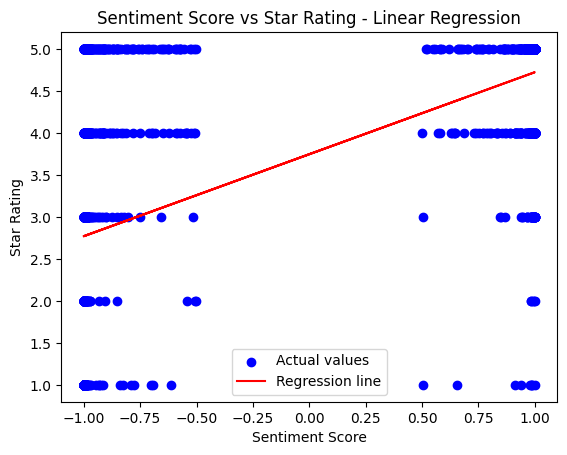

Star_rating
1   -0.952177
2   -0.896700
3   -0.549502
4    0.213872
5    0.574910
Name: Score, dtype: float64


In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')  # Actual values
plt.plot(X_test, y_pred, color='red', label='Regression line')  # Predicted values (line)
plt.xlabel('Sentiment Score')
plt.ylabel('Star Rating')
plt.title('Sentiment Score vs Star Rating - Linear Regression')
plt.legend()
plt.show()

average_sentiment_by_star = bert_sentiment_df.groupby('Star_rating')['Score'].mean()

print(average_sentiment_by_star)

The plot is messy and shows a linear regression is probably not best for this. The summary statistics does show there is a positive trend between star rating and sentiment

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5585
Confusion Matrix:
[[310   0   0   0  15]
 [134   0   0   0   8]
 [126   0   0   0  39]
 [133   0   0   0 243]
 [185   0   0   0 807]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In the case of a multinomial logistic regression, the model did not do well. With an accuracy of 54%, the model didn't do much better than a random guesser. Let's try and run a binary logistic regression and alter stars 1-3 as negative and stars 4 and 5 as positive.

Accuracy: 0.8035
Confusion Matrix:
[[ 577   55]
 [ 338 1030]]


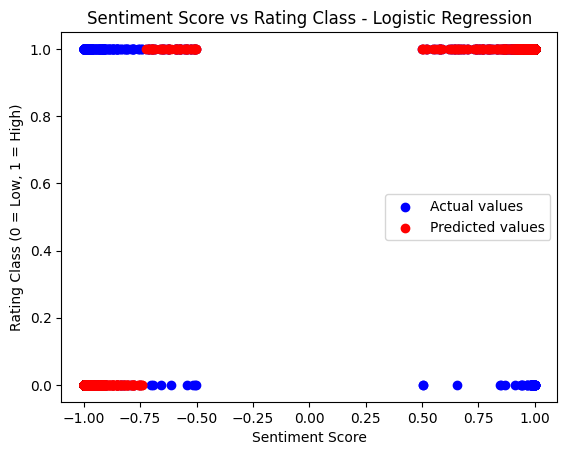

In [ ]:
bert_sentiment_df['rating_class'] = bert_sentiment_df['Star_rating'].apply(lambda x: 1 if x >= 4 else 0)
X = bert_sentiment_df[['Score']]
y = bert_sentiment_df['rating_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.scatter(X_test, y_pred, color='red', label='Predicted values')
plt.xlabel('Sentiment Score')
plt.ylabel('Rating Class (0 = Low, 1 = High)')
plt.title('Sentiment Score vs Rating Class - Logistic Regression')
plt.legend()
plt.show()

With an accuracy of 80%, we do much better using a binary logistic model. The problem were seeing though is we are lacking balance in our dataset. We are now going to re run our logistic model with better balance. We are going to grab an equal number of reviews from each star rating.

In [ ]:
#reclean the data, we take a random sample of data from our original data set with a balance of 2000 for each star rating. We also limit the data to only reviews with less than 512 characters so we don't have to truncate
combined_df = pd.read_csv('combined_df.csv')
combined_df = combined_df[combined_df['review_body'].str.len() < 512]
combined_bert = pd.concat([
    combined_df[combined_df['star_rating'] == 1].sample(n=2000, random_state=42),
    combined_df[combined_df['star_rating'] == 2].sample(n=2000, random_state=42),
    combined_df[combined_df['star_rating'] == 3].sample(n=2000, random_state=42),
    combined_df[combined_df['star_rating'] == 4].sample(n=2000, random_state=42),
    combined_df[combined_df['star_rating'] == 5].sample(n=2000, random_state=42)
])



In [ ]:
#Instantiate model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
bert_combined = tokenizer(combined_df['review_headline'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

In [ ]:
print(bert_combined)

{'input_ids': tensor([[  101,  2489,  4007,  ...,     0,     0,     0],
        [  101,  2025,  4569,  ...,     0,     0,     0],
        [  101, 29350,  2152,  ...,     0,     0,     0],
        ...,
        [  101,  2054,  3047,  ...,     0,     0,     0],
        [  101,  2064,  1005,  ...,     0,     0,     0],
        [  101,  2274,  3340,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [ ]:
input_ids = bert_combined["input_ids"]
attention_mask = bert_combined["attention_mask"]
with torch.no_grad():
    outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
token_embeddings = outputs.last_hidden_state  # Token-level embeddings
cls_embeddings = token_embeddings[:, 0, :]

## Aftermath of Unsuccessful Labeling Attempts

After exploring several unsupervised learning methods, we found that we could not effectively label the Amazon review data as fake or real. There are other things we could have done to improve performance. For example, acquiring more data (with more customer oriented features) and better data (especially data that contains clearly fake reviews) could have significantly improved the models performance. However, obtaining additional data for this task is extremely challenging. Collecting and curating a large, high-quality dataset with potential indicators of fake reviews requires substantial time and resources, especially when considering it has to properly correlate the same review. Given these constraints and the limited time frame of our project, pursuing more data was not a practical option.

In light of these challenges, we decided to just use the 'star_rating' column as our label for classification. While we acknowledge that this is not a perfect measure of review authenticity, it provides a practical starting point given our project's constraints. Star rating is always an important feature when looking at a review's quality. Extremes in ratings or differences to other's ratings can indicate that a review is fake.

This approach allows us to move forward with a supervised learning framework, while recognizing that further refinements, such as integrating additional features like textual analysis or metadata, would be necessary to improve the accuracy and reliability of identifying fake reviews in future iterations.

In [ ]:
combined_df.to_csv('combined_df.csv',index=False)
features_df.to_csv('features_df.csv',index=False)

# Section 5: Build ML Classification Models

## Section 5.1: Create and Standardize the Training and Test Data




In [98]:
# Load data
combined_df = pd.read_csv('combined_df.csv')
features_df = pd.read_csv('features_df.csv')

In [ ]:
### Create a target variable 'rating' from 'star_rating'
# This will combine ratings 2, 3 and 4
# This is mainly done because there are much fewer reviews with ratings 2 and 3
features_df['rating'] = features_df['star_rating'].apply(
  lambda x: 'poor rating' if x == 1 else ('average rating' if x <= 4 else 'well rated')
)
### Store target variable
target = features_df['rating']
### Store features dataframe
features = features_df.drop(columns=['rating', 'star_rating'])

In [99]:
features_df['rating'] = features_df['star_rating'].apply(
  lambda x: 'fake' if x <= 2 else 'real'
)
### Store target variable
target = features_df['rating']
### Store features dataframe
features = features_df.drop(columns=['rating', 'star_rating', 'customer_avg_rating'])

In [ ]:
### feature standardization

In [100]:
### Training, testing(validation) and hold out testing
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.4, random_state=42)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [101]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_holdout.shape)
print(y_holdout.shape)

(180000, 26)
(180000,)
(60000, 26)
(60000,)
(60000, 26)
(60000,)


In [102]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on train data, transform train data
X_test_scaled = scaler.transform(X_test)       # Use the same scaler to transform test data
X_holdout_scaled = scaler.transform(X_holdout) # Use the same scaler to transform holdout data

In [96]:
X_train_scaled.shape

(180000, 27)

## Section 5.2: Logistic Regression

The first model we decided to implement is a logistic regression model. This is because logistic regression is a good and easy to implement model that can deal with classification problems.

In [103]:
# Create and fit the Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Calculate the accuracy on the test set
log_acc = log_model.score(X_test_scaled, y_test)

# Print the accuracy
print(f"Logistic Regression Test Accuracy: {log_acc:.4f}")

# Predict on the test set to generate the classification report
y_pred = log_model.predict(X_test_scaled)

print()
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Test Accuracy: 0.9402

Classification Report:
              precision    recall  f1-score   support

        fake       0.84      0.73      0.78      8870
        real       0.95      0.98      0.97     51130

    accuracy                           0.94     60000
   macro avg       0.90      0.85      0.87     60000
weighted avg       0.94      0.94      0.94     60000



In [104]:
# Grid Search to find the best model
# Set up hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2'],                    # Norm used in the penalization
    'solver': ['liblinear'],                    # Solver that supports L1 and L2 penalties
}

log_model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(estimator=log_model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)
holdout_accuracy = best_model.score(X_holdout_scaled, y_holdout)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [105]:
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Holdout Accuracy: {holdout_accuracy:.4f}")

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.9407
Holdout Accuracy: 0.9389


In [106]:
# Generate classification report on the best model
y_pred = best_model.predict(X_test_scaled)

print(f"Logistic Regression Test Accuracy: {log_acc:.4f}")
print()
print("Classification Report on the Best Model:")
print(classification_report(y_test, y_pred))

Logistic Regression Test Accuracy: 0.9402

Classification Report on the Best Model:
              precision    recall  f1-score   support

        fake       0.85      0.73      0.78      8870
        real       0.95      0.98      0.97     51130

    accuracy                           0.94     60000
   macro avg       0.90      0.85      0.87     60000
weighted avg       0.94      0.94      0.94     60000



Overall, the model was pretty accurate and could be a suitable model for its goal.

## Section 5.3: Random Forest Classifier

We decide to create a Random Forest Classifier mainly for two reasons. A random forest classifier is a really powerful model for classification tasks. Additionally, a random forest model can also give insight on the importance of features.

In [107]:
# Set up hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],           # Number of trees in the forest
    'max_depth': [10, 20],          # Maximum depth of the trees
    'min_samples_split': [2, 5],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 4],            # Minimum samples required at a leaf node
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)

# Evaluate the best model on the holdout data
holdout_accuracy = best_model.score(X_holdout_scaled, y_holdout)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [108]:
# Print results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Holdout Accuracy: {holdout_accuracy:.4f}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9548
Holdout Accuracy: 0.9538


In [109]:
# Generate classification report on the best model
y_pred = best_model.predict(X_test_scaled)

print(f"Random Forest Classifier Test Accuracy: {test_accuracy:.4f}")
print()
print("Classification Report on the Best Model:")
print(classification_report(y_test, y_pred))

Random Forest Classifier Test Accuracy: 0.9548

Classification Report on the Best Model:
              precision    recall  f1-score   support

        fake       0.91      0.78      0.84      8870
        real       0.96      0.99      0.97     51130

    accuracy                           0.95     60000
   macro avg       0.93      0.88      0.90     60000
weighted avg       0.95      0.95      0.95     60000



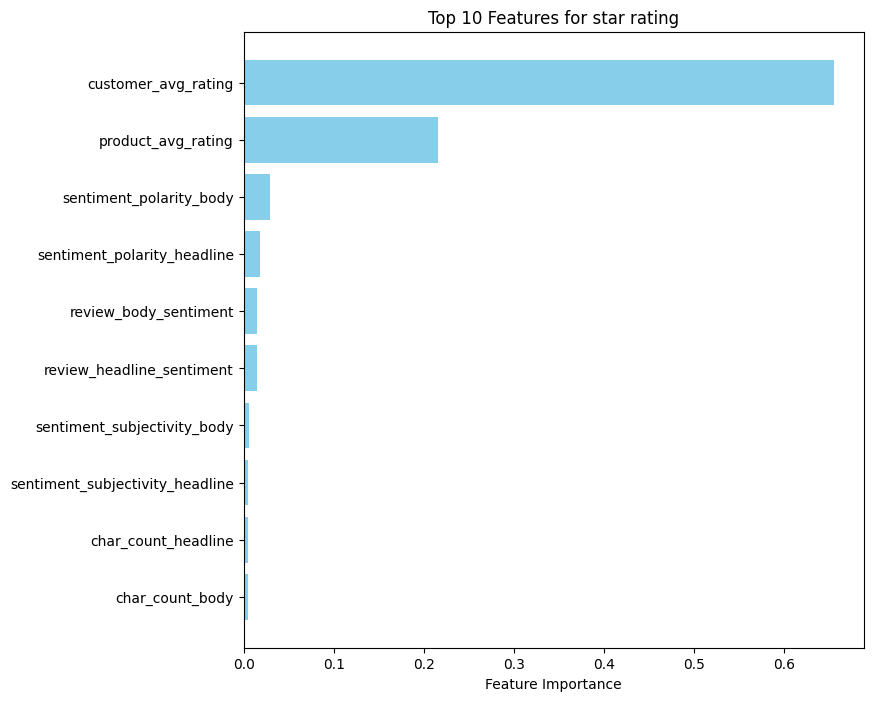

In [ ]:
feature_importances = best_model.feature_importances_
# feature_importances
# TO-DO: Get the top 10 and Create a DataFrame `feature_importance_df`
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Feature Importance': feature_importances
})
feature_importance_df = importance_df.nlargest(10, 'Feature Importance')
plt.figure(figsize=(8, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Feature Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Features for star rating')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

The most important features were the average star rating features. This could be because so many reviews had 5 star rating. That would make skew the average star ratings higher. The next most important features were the sentiment related features. This makes logical sense because one would assume the sentiment would be a good indicator to rating of the review.

Overall, it seems like the random forest classifier performed slighly better.

## Section 5.4: FNN Model

After using the previous machine learning models, we decided we would explore a deep learning model to see if it could produce  interesting results.

Since the previous models were already pretty successful, we decided to explore a different label for this model. In this case we decided to explore how to detect a positive or negative model.

In [ ]:
combined_df = pd.read_csv('combined_df.csv')
features_df = pd.read_csv('features_df.csv')

In [ ]:
# Create binary sentiment column based on polarity of the review body
combined_df['sentiment'] = combined_df['sentiment_polarity_body'].apply(lambda x: 'positive' if x > 0 else 'negative')

In [ ]:
# Map 'positive' -> 1 and 'negative' -> 0
combined_df['sentiment_binary'] = combined_df['sentiment'].map({'positive': 1, 'negative': 0})

# Prepare features and labels
X = features_df  # Feature matrix (processed earlier in the notebook)
y = combined_df['sentiment_binary']  # Binary sentiment labels

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
import torch.nn as nn
class SentimentFNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentFNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # Raw logits for CrossEntropyLoss

# Define model parameters
input_size = X_train.shape[1]
hidden_size = 128
output_size = 2

# Instantiate the model
model = SentimentFNN(input_size, hidden_size, output_size)


In [ ]:
import torch.optim as optim
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 0.4929
Epoch [20/50], Loss: 0.4046
Epoch [30/50], Loss: 0.3551
Epoch [40/50], Loss: 0.3202
Epoch [50/50], Loss: 0.2946


In [ ]:
from sklearn.metrics import classification_report
# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = torch.argmax(outputs, dim=1)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Test Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))

Test Accuracy: 0.8805
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.41      0.53      9724
           1       0.90      0.97      0.93     50276

    accuracy                           0.88     60000
   macro avg       0.81      0.69      0.73     60000
weighted avg       0.87      0.88      0.87     60000



From these results, the FNN appears to do slightly worse. However, this could be due to lack of train data and training time. Since our data contains a lot of features. The FNN model might have needed to have more training data, which was not feasible.

## Section 5.5: Time series analysis (ARIMA)

One final model we would like to use is ARIMA to detect whether over time, sentiment has changed for a product. We believe this would be especially insightful for the Video Game category. Video Games often are released in a poor state and have bugs or are incomplete. We want to see if Video Games have a sentiment change over time to show whether a developer continues to make improvements to their games.

In [ ]:
#the file below has the top 25 most reviewed video games and their star ratings along with sentiment ratings
video_games_df = pd.read_csv('combined_hugging_games.csv')

We ensure the date time column is date time and set it as our index for our model since were are modeling over date time

In [ ]:
video_games_df['review_date'] = pd.to_datetime(video_games_df['review_date'])
video_games_df.set_index('review_date', inplace=True)

We now loop through each product and display the forecast. We have commented this section out since it takes a significant amount of time. We will look through the 25 products and choose our top games that have strong positive or negative future forecasts and plot the forecast along with the moving average for each of them.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

Forecast for Grand Theft Auto V:


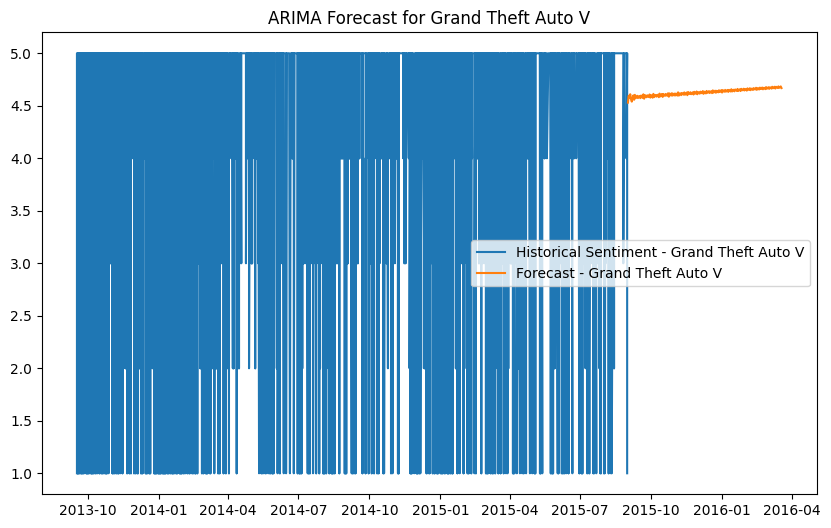

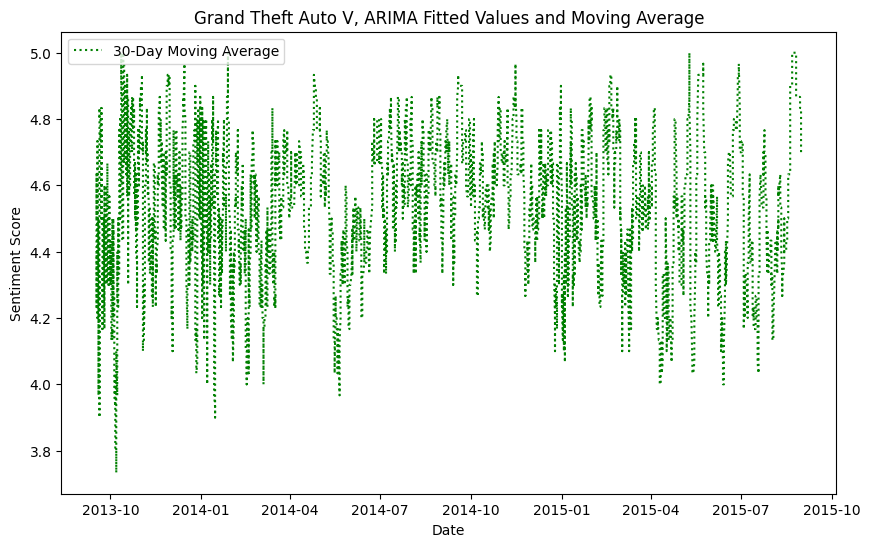

In [ ]:
results = {}

# for product_id, group in video_games_df.groupby('product_title'):
#     product_data = group['Score'].sort_index()

#     model = ARIMA(product_data, order=(4, 2, 12))
#     model_fit = model.fit()

#     results[product_id] = model_fit.summary()

#     forecast_steps = 250
#     forecast = model_fit.forecast(steps=forecast_steps)

#     print(f"Forecast for {product_id}:")
#     print(forecast)

#     plt.figure(figsize=(10, 6))
#     plt.plot(product_data.index, product_data, label=f'Historical Sentiment - {product_id}')
#     plt.plot(pd.date_range(product_data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label=f'Forecast - {product_id}')
#     plt.title(f'ARIMA Forecast for {product_id}')
#     plt.legend()
#     plt.show()
#     window_size = 30  # Example: 7-day moving average
#     sma = product_data.rolling(window=window_size).mean()

#     plt.plot(product_data.index, sma, label=f'{window_size}-Day Moving Average', color='green', linestyle=':')

#     plt.title("Original Data, ARIMA Fitted Values and Moving Average")
#     plt.legend(loc='upper left')
#     plt.xlabel('Date')
#     plt.ylabel('Sentiment Score')
#     plt.show()

#groupby product data and select GTA V as our example
def arima_model(product_title):
  product_data = video_games_df[video_games_df['product_title'] == product_title]['star_rating'].sort_index()

  #run an arima model with 4 as our autoregressive term, 2 as our differencing term and 12 as our moving average term
  #we noticed having a large moving average helped with having a trend in the forecast. A small moving average captured to little past data
  model = ARIMA(product_data, order=(4, 2, 12))
  model_fit = model.fit()


  forecast_steps = 200
  forecast = model_fit.forecast(steps=forecast_steps)
  print(f"Forecast for {product_title}:")

  plt.figure(figsize=(10, 6))
  plt.plot(product_data.index, product_data, label=f'Historical Sentiment - {product_title}')
  plt.plot(pd.date_range(product_data.index[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label=f'Forecast - {product_title}')
  plt.title(f'ARIMA Forecast for {product_title}')
  plt.legend()
  plt.show()
  window_size = 30  # Example: 7-day moving average
  sma = product_data.rolling(window=window_size).mean()
  plt.figure(figsize=(10, 6))
  plt.plot(product_data.index, sma, label=f'{window_size}-Day Moving Average', color='green', linestyle=':')
  plt.subplots_adjust(hspace=0.5)
  plt.title(f"{product_title}, ARIMA Fitted Values and Moving Average")
  plt.legend(loc='upper left')
  plt.xlabel('Date')
  plt.ylabel('Sentiment Score')
  plt.show()

arima_model('Grand Theft Auto V')


GTA V is a wildly popular game that has received numerous updates to the game as time has gone on. The forecast shows that these updates may have had a positive impact on the games star_rating over time.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/pyth

Forecast for Halo 4:


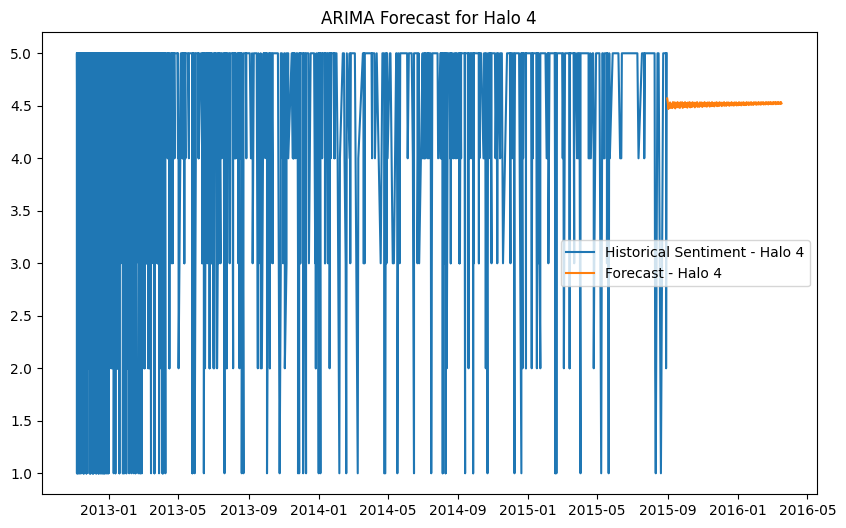

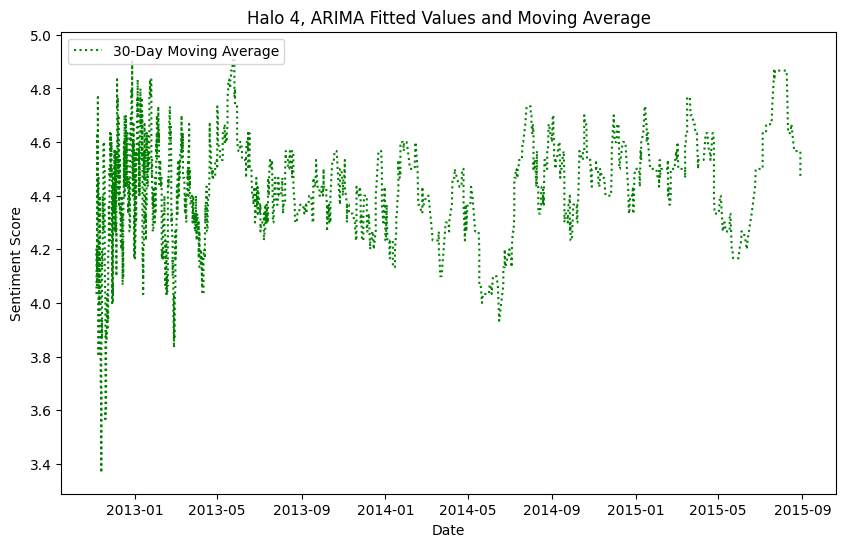

In [ ]:
arima_model('Halo 4')

Halo 4 is another game that was a major hit in the industry. This game was more of a stand alone game and did not receive as many updates over time as GTA V which explains the flatter forecast.

# Section 6: Future Work

We believe there could be much more to be explored in the Amazon review data set. Below are some of the ideas we haven't had time to explore.

*   The amazon review dataset can be combine with other dataset with fake review labeled ([Fake Review Dataset](https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset/data)) to better detect fake reviews.
*  Enable model training with a distributed computing system like Pytorch with GPU and/or Apache Spark MLlib.
*  Explore building our own fake versus real label data set whether by having A.I create fake reviews or exploring our clustering methods to see if fake labels can be identified through that method
*  Training our own large language model on fake labels to run all of the amazon data to see if fake labels can be detected
*  Training a large language model on the star rating and sentiment of the reviews to see whether we can better predict star rating through sentiment




